# Imports

In [413]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [414]:
books = pd.read_csv("goodreads_library_export2.csv")

In [415]:
books.columns

Index(['Book Id', 'Title', 'Author', 'Author l-f', 'Additional Authors',
       'ISBN', 'ISBN13', 'My Rating', 'Average Rating', 'Publisher', 'Binding',
       'Number of Pages', 'Year Published', 'Original Publication Year',
       'Date Read', 'Date Added', 'Bookshelves', 'Bookshelves with positions',
       'Exclusive Shelf', 'My Review', 'Spoiler', 'Private Notes',
       'Read Count', 'Recommended For', 'Recommended By', 'Owned Copies',
       'Original Purchase Date', 'Original Purchase Location', 'Condition',
       'Condition Description', 'BCID'],
      dtype='object')

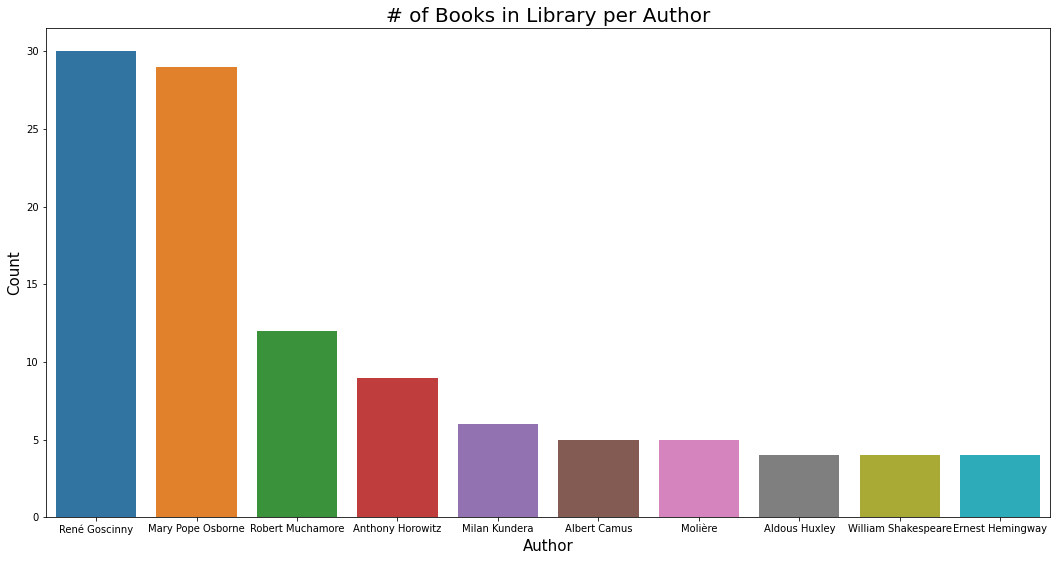

In [416]:
fig = plt.figure(figsize=(18,9))
ax = fig.add_subplot(111)
ax.set_title("# of Books in Library per Author",fontsize=20)
order = books["Author"].value_counts().head(10).index
sns.countplot(x=books["Author"],order=order)
ax.set_xlabel('Author',fontsize = 15) #xlabel
ax.set_ylabel('Count', fontsize = 15)
fig.savefig('books_author.png')

In [417]:
books["Year Published"].fillna(2001,inplace=True)
books["Year Published"] = books["Year Published"].astype(int)

In [418]:
books.nlargest(10,"Number of Pages")[["Title","Author","Number of Pages"]]

,Title,Author,Number of Pages
276,In Search of Lost Time (6 Volumes),Marcel Proust,4211.0
291,The Man Without Qualities,Robert Musil,1774.0
281,War and Peace,Leo Tolstoy,1392.0
78,The Count of Monte Cristo,Alexandre Dumas,1276.0
280,Don Quixote,Miguel de Cervantes Saavedra,1023.0
125,Less and More: The Design Ethos of Dieter Rams,Klaus Klemp,808.0
123,"The City in History: Its Origins, Its Transfor...",Lewis Mumford,784.0
98,A Promised Land,Barack Obama,768.0
270,The Second Sex,Simone de Beauvoir,746.0
71,The Search For Modern China,Jonathan D. Spence,730.0


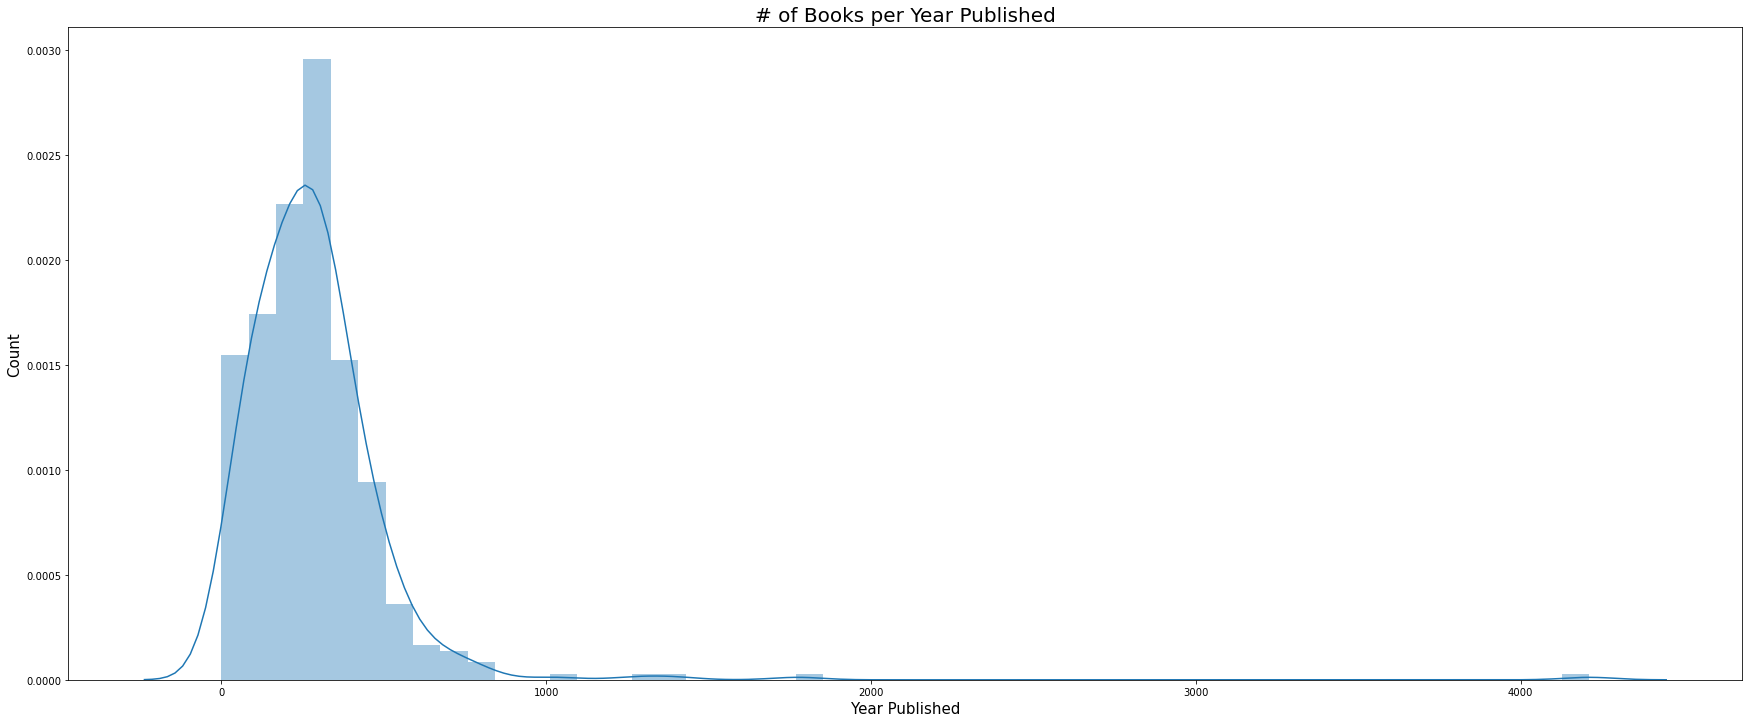

In [419]:
fig = plt.figure(figsize=(30,12))
ax = fig.add_subplot(111)
ax.set_title("# of Books per Year Published",fontsize=20)
sns.distplot(books["Number of Pages"])
ax.set_xlabel('Year Published',fontsize = 15) #xlabel
ax.set_ylabel('Count', fontsize = 15)
fig.savefig('books_year.png')

Text(0, 0.5, 'Count')

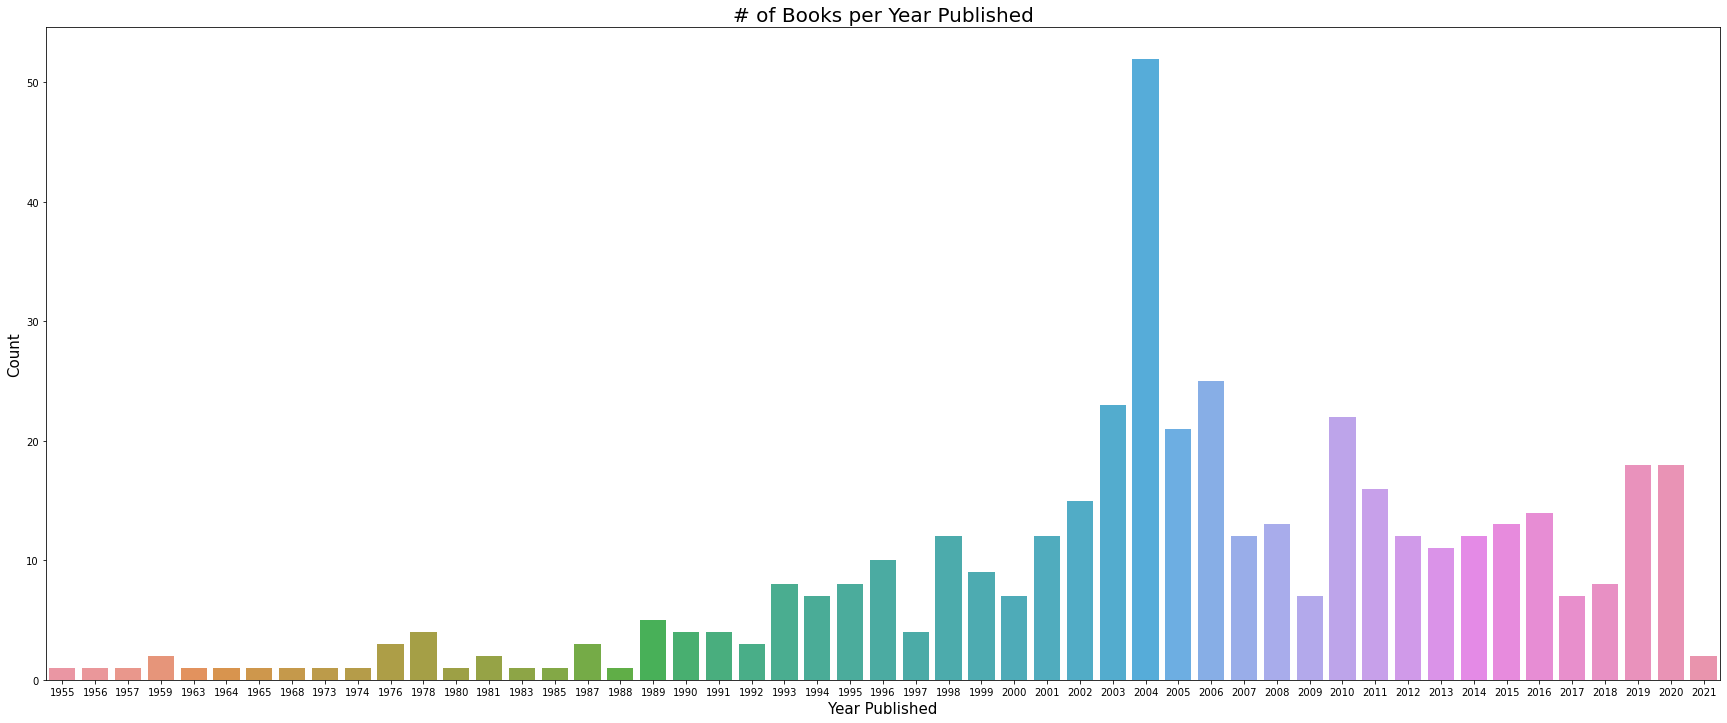

In [420]:
fig = plt.figure(figsize=(30,12))
ax = fig.add_subplot(111)
ax.set_title("# of Books per Year Published",fontsize=20)
sns.countplot(books["Year Published"])
ax.set_xlabel('Year Published',fontsize = 15) #xlabel
ax.set_ylabel('Count', fontsize = 15)

In [421]:
books = books.drop(['Recommended For', 'Recommended By', 'Owned Copies',"Additional Authors",
       'Original Purchase Date', 'Original Purchase Location', 'Condition',
       'Condition Description', 'BCID',"Bookshelves","Bookshelves with positions","My Review","Author l-f","ISBN13","Spoiler","Private Notes"],axis="columns")

In [422]:
id1 = []
for i in books["ISBN"]: 
    i = i[2:]
    i =(i[:-1])
    id1.append(i)

# Adding Variables

## Google API

In [11]:
import requests #we import the requests library (to simulate our HTTP request)
categories = []
ratings_count = []
for i in id1: #id1 contains all of the ISBNs, we thus iterate over the list to get the information for each book
    if len(i) > 0: 
        soup = requests.get(f"https://www.googleapis.com/books/v1/volumes?q=isbn:{i}").json() 
        #this returns our result in a json format
        try:
            #because some of the books do not seem to have ratingsCount or Categorie, they return Errors. 
            #We use try and except to prevent the entire program from crashing every time one of the books does not 
            #have a ratingsCount or Categorie.
            ratings_count.append(soup["items"][0]["volumeInfo"]["ratingsCount"]) #This returns the book's RatingCount
        except KeyError:
            ratings_count.append(0) #We add 0 if there are none to keep the order of our books intact
        try:
            categories.append(soup["items"][0]["volumeInfo"]["categories"][0].lstrip().lower()) #returns the Categorie
        except KeyError:
            categories.append(0)
    else:
        ratings_count.append(0)
        categories.append(0)

In [12]:
books["Reviews"] = books["Publisher"]
books["Categories"] = books["Publisher"]

In [13]:
for i in range(0,len(books["Reviews"])):
    books["Reviews"][i] = ratings_count[i]
    books["Categories"][i] = categories[i]

In [14]:
books[["Title","Author","Reviews","Categories"]]

,Title,Author,Reviews,Categories
0,Introduction L'Histoire de Notre Temps. Le Xxe...,Ren' R'Mond,0,fiction
1,Formations of European Modernity: A Historical...,Gerard Delanty,0,social science
2,Jehan de Loin,Bertrand Solet,0,0
3,L'Amour,Marguerite Duras,0,fiction
4,"Wine Politics: How Governments, Environmentali...",Tyler Colman,0,business & economics
...,...,...,...,...
436,Of Mice and Men,John Steinbeck,0,0
437,Animal Farm,George Orwell,0,0
438,Wuthering Heights,Emily Brontë,0,0
439,To Kill a Mockingbird,Harper Lee,0,0


# Scrape

Two options: Scraping as done below, or with api and the following link :) https://www.goodreads.com/book/isbn/0446694975?key=xQXvrwOTLq7xonOLcjt2A

In [19]:
import requests #We'll use requests to simulate our browser's HTML request
from bs4 import BeautifulSoup #We'll use BeautifulSoup to parse the HTML 
ids=[]
for i in books["Book Id"]:
    ids.append(i) #obtaining the book's individual IDs

In [20]:
def url_maker():#1st we have to generate the Book's URL by adding its ID
    for i in ids:
        url = f'https://www.goodreads.com/book/show/{i}'
        soup_maker(url) #we then call this function for each URL 

In [21]:
more_categories = []
def soup_maker(url): #this function collects the book's genres 
    prov_list = []
    response = requests.get(url) #we get the HTML code
    soup = BeautifulSoup(response.content, "html.parser") #we parse it
    for i in soup.find_all(class_="elementList"): #where the genres are-
        prov_list.append(i.find('a').text) #-located in the HTML code
    prov_list = list(dict.fromkeys(prov_list)) #remove list duplicates
    prov_list = list(filter(None, prov_list)) #remove empty values
    more_categories.append(prov_list)
    return more_categories #we return our list

In [22]:
url_maker() #we now simply have to call our 1st function

In [23]:
more_categories

[[],
 ['History'],
 [],
 ['Fiction',
  'Cultural',
  'Literature',
  'Novels',
  'European Literature',
  'Contemporary',
  'Classics',
  'Womens',
  'Romance',
  'Literary Fiction'],
 ['Alcohol', 'Nonfiction'],
 ['Science', 'Nonfiction'],
 ['History',
  'Nonfiction',
  'European Literature',
  'Humanities',
  'Historical',
  'Reference',
  'Classics',
  'Textbooks'],
 ['European Literature',
  'Fiction',
  'Fantasy',
  'Young Adult',
  'Academic',
  'Female Authors',
  'Novels',
  'Retellings',
  'Feminism'],
 ['Cultural'],
 [],
 ['Travel'],
 ['Classics',
  'Fiction',
  'Cultural',
  'European Literature',
  'Romance',
  'Literature',
  'Novels',
  'Historical',
  'Academic'],
 ['Economics', 'Politics'],
 ['Nonfiction',
  'Religion',
  'Science',
  'Philosophy',
  'Writing',
  'Audiobook',
  'Buddhism',
  'Spirituality',
  'Biology'],
 [],
 ['Classics',
  'Adventure',
  'Fiction',
  'Cultural',
  'Short Stories',
  'Literature',
  'Science Fiction',
  'Fantasy'],
 ['Classics',
  'Play

In [ ]:
response = requests.get("https://www.goodreads.com/book/show/5111")
soup = BeautifulSoup(response.content, "html.parser")
print(soup) #simply looking at one of the books that generated
#empty categories, we realize that the page's HTML code was very weird

# API

In [423]:
import requests #We'll use requests to simulate our browser's HTML request
from bs4 import BeautifulSoup
ids=[]
for i in books["Book Id"]:
    ids.append(i) #obtaining the book's individual IDs

In [424]:
genreExceptions = [
'to-read', 'currently-reading', 'owned', 'default', 'favorites', 'books-i-own',
'ebook', 'kindle', 'library', 'audiobook', 'owned-books', 'audiobooks', 'my-books',
'ebooks', 'to-buy', 'english', 'calibre', 'books', 'british', 'audio', 'my-library',
'favourites', 're-read', 'general', 'e-books',"read-in-2020"
] #ignore these different bookshelves
genres = []

In [425]:
def get_xml(): #obtaining the bookshelves in which the book is included
    for i in ids: 
        test = requests.get(f"https://www.goodreads.com/book/show/{i}?key=xQXvrwOTLq7xonOLcjt2A")
        test = BeautifulSoup(test.content, "lxml")
        shelves = test.find("popular_shelves")
        finding_genres(shelves)
    return genres

In [426]:
def finding_genres(shelves): #filtering the bookshelves to obtain only
    prov_genres = [] #the first 8 results
    for i in shelves:
        if len(i) == 0:
            x = i.attrs["name"]
            if x not in genreExceptions:
                if len(prov_genres) < 8:
                    x = x.replace("non-fiction","nonfiction").lower()
                    prov_genres.append(x)
                    prov_genres = list(dict.fromkeys(prov_genres))
    genres.append(prov_genres)
    return genres

In [427]:
get_xml() #we now simply have to call our 1st function

[['histoire'],
 ['history',
  'tör',
  'polit',
  'nonf',
  'lek',
  'uni-books',
  'modernity',
  'historia'],
 ['roman-historique',
  'fantastique',
  'parents-library',
  'childhood',
  'bibliothèque',
  'own-to-read',
  'my-kid-teenage-years-reads',
  'for-school'],
 ['fiction',
  'french',
  'france',
  'français',
  'literature',
  'novels',
  'marguerite-duras',
  'french-literature'],
 ['wine',
  'nonfiction',
  'read-in-2021',
  'scribd',
  'in-english',
  'c-wine',
  'c-politics-political-science',
  'nonfiction-2018'],
 ['science',
  'nonfiction',
  'non-fic',
  'queue',
  'no-self',
  'books-started-but-not-finished',
  'read-2020',
  'nonfic'],
 ['history',
  'nonfiction',
  'very-short-introductions',
  'ancient-history',
  'a-very-short-introduction',
  'vsi',
  'very-short-introduction',
  'britain'],
 ['spanish',
  'juvenil',
  'novela',
  'spanish-literature',
  'fiction',
  'español',
  'fantasy',
  'literatura-española'],
 ['novela',
  'spain',
  'novela-histórica',

In [428]:
len(genres)

441

In [429]:
books = books.reset_index()

In [430]:
genres_df = pd.DataFrame({"Genres":genres}).reset_index()

In [431]:
genres_df.merge(books,on="index")

,index,Genres,Book Id,Title,Author,ISBN,My Rating,Average Rating,Publisher,Binding,Number of Pages,Year Published,Original Publication Year,Date Read,Date Added,Exclusive Shelf,Read Count
0,0,[histoire],31172358,Introduction L'Histoire de Notre Temps. Le Xxe...,Ren' R'Mond,"=""275784007X""",3,2.89,Contemporary French Fiction,Paperback,NaN,2014,NaN,NaN,2020/01/06,read,1
1,1,"[history, tör, polit, nonf, lek, uni-books, mo...",17377501,Formations of European Modernity: A Historical...,Gerard Delanty,"=""113728790X""",2,2.68,Palgrave Macmillan,Hardcover,352.0,2013,2013.0,NaN,2020/01/06,read,1
2,2,"[roman-historique, fantastique, parents-librar...",4096948,Jehan de Loin,Bertrand Solet,"=""201321880X""",3,3.08,Le livre de poche jeunesse,Paperback,187.0,2001,2001.0,NaN,2020/09/02,read,0
3,3,"[fiction, french, france, français, literature...",17332697,L'Amour,Marguerite Duras,"=""1934824798""",3,3.28,Open Letter Books,Paperback,112.0,2013,1972.0,NaN,2020/01/04,read,1
4,4,"[wine, nonfiction, read-in-2021, scribd, in-en...",3283513,"Wine Politics: How Governments, Environmentali...",Tyler Colman,"=""0520255216""",3,3.34,University of California Press,Hardcover,208.0,2008,2008.0,2020/05/01,2020/05/01,read,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436,436,"[classics, fiction, classic, school, historica...",890,Of Mice and Men,John Steinbeck,"=""0142000671""",5,3.88,Penguin Books,Paperback,103.0,2002,1937.0,NaN,2020/01/04,read,1
437,437,"[classics, fiction, classic, dystopia, fantasy...",170448,Animal Farm,George Orwell,"=""0451526341""",4,3.96,Signet Classics,Mass Market Paperback,141.0,1996,1945.0,NaN,2020/01/04,read,1
438,438,"[classics, fiction, classic, romance, gothic, ...",6185,Wuthering Heights,Emily Brontë,"=""""",4,3.87,Norton,Paperback,464.0,2002,1847.0,NaN,2020/01/04,read,1
439,439,"[classics, fiction, classic, historical-fictio...",2657,To Kill a Mockingbird,Harper Lee,"=""""",5,4.28,Harper Perennial Modern Classics,Paperback,324.0,2006,1960.0,NaN,2020/01/04,read,1


# Viz

In [38]:
#books["Genres"].value_counts().head(10).plot(kind="bar")

# Encoding

In [432]:
df = pd.get_dummies(pd.DataFrame(genres))
df.columns = df.columns.str.split("_").str[-1]

In [433]:
df1 = pd.DataFrame({"index":np.arange(0,441)})

In [434]:
genres_dupli = []

In [435]:
for i in df.columns:
    if i not in genres_dupli:
        try: 
            df1[i]= pd.DataFrame(df[i].sum(axis=1))
            genres_dupli.append(i)
        except ValueError:
            df1[i] = pd.DataFrame(df[i])
            genres_dupli.append(i)

In [436]:
df1

,index,activism,adventure,africa,business,cherub,chess,childhood,children,childrens,...,technology-history,this-is-the-war-room,travel-writing,uk,urban-studies,usa-history,wish-list,ya-lit,yoga,小說
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436,436,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
437,437,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
438,438,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
439,439,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Useless

In [437]:
# creating initial dataframe
categories_types = ('biography & autobiography', 'games', 0, 'sports & recreation',
       'history', 'science', 'self-help', 'business & economics',
       'mathematics', 'computers', 'literary collections', 'families',
       'political science', 'nature', 'education', 'fiction',
       'social science', 'design', 'philosophy',
       'language arts & disciplines', 'body, mind & spirit',
       'family & relationships', 'juvenile fiction', 'equality',
       'leadership', 'medical', 'psychology', 'dictators',
       'man-woman relationships', 'existentialism', 'drama',
       'cross-country running', 'poetry', 'cocaine', 'suicide',
       'immigrants', 'short stories', 'children of holocaust survivors',
       'english language', 'france', 'psychological fiction', 'religion',
       'business', 'self-acceptance', 'civilization', 'humor',
       'buchenwald (concentration camp)', 'war',
       'pilgrims (new plymouth colony)', 'literature',
       'juvenile nonfiction', 'comics & graphic novels',
       'adventure and adventurers', 'animal rights activists',
       'human trafficking', 'communism')
books_2 = pd.DataFrame(categories_types, columns=['Categories'])
# generate binary values using get_dummies
dum_df = pd.get_dummies(books_2, columns=["Categories"], prefix=["Type_is"] )
# merge with main df bridge_df on key values

## Other Analysis

In [438]:
books = books.reset_index()

In [439]:
books = books.merge(df1,on="index")

In [440]:
mira = books[books["Exclusive Shelf"] == "read"][["My Rating","Exclusive Shelf"]]

In [441]:
books_read = books[books["Exclusive Shelf"] == "read"]

In [38]:
books_read["Publisher"].fillna("0",inplace=True)
books_read["Original Publication Year"].fillna("0",inplace=True)
books_read["Number of Pages"].fillna("0",inplace=True)
books_read["Year Published"].fillna("0",inplace=True)

# split

In [443]:
drop_columns = [ 'Book Id', 'Title', 'Author', 'Author l-f',
       'Additional Authors', 'ISBN', 'ISBN13', 'My Rating',
       'Publisher', 'Binding', 'Number of Pages', 'Year Published',
       'Original Publication Year', 'Date Read', 'Date Added', 'Bookshelves',
       'Bookshelves with positions', 'Exclusive Shelf', 'My Review', 'Spoiler',
       'Private Notes', 'Read Count', 'Recommended For', 'Recommended By',
       'Owned Copies', 'Original Purchase Date', 'Original Purchase Location',
       'Condition', 'Condition Description', 'BCID']

In [442]:
books["Exclusive Shelf"].unique()

array(['read', 'currently-reading', 'to-read'], dtype=object)

In [41]:
books_read.drop(drop_columns, axis="columns").sum().sort_values()

KeyError: "['Author l-f' 'Additional Authors' 'ISBN13' 'Bookshelves'\n 'Bookshelves with positions' 'My Review' 'Spoiler' 'Private Notes'\n 'Recommended For' 'Recommended By' 'Owned Copies'\n 'Original Purchase Date' 'Original Purchase Location' 'Condition'\n 'Condition Description' 'BCID'] not found in axis"

In [42]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(books_read, test_size=0.2)
X_train = train_set[['self-development_y', 'school_y', 'fantasy_y', 'economics_y', 'biography_y',
       'france_y', 'french-literature_y', 'personal-development_y',
       'historical-fiction_y', 'self-improvement_y', 'politics_y', 'science_y',
       'self-help_y', 'history_y', 'french_y', 'business_y', 'novels_y', 'psychology_y',
       'philosophy_y', 'classic_y', 'literature_y', 'classics_y', 'fiction_y',
       'nonfiction_y', 'Average Rating']]
y_train = train_set["My Rating"]
X_test = test_set[['self-development_y', 'school_y', 'fantasy_y', 'economics_y', 'biography_y',
       'france_y', 'french-literature_y', 'personal-development_y',
       'historical-fiction_y', 'self-improvement_y', 'politics_y', 'science_y',
       'self-help_y', 'history_y', 'french_y', 'business_y', 'novels_y', 'psychology_y',
       'philosophy_y', 'classic_y', 'literature_y', 'classics_y', 'fiction_y',
       'nonfiction_y', 'Average Rating']]
y_test = test_set["My Rating"]

KeyError: "['fantasy_y', 'personal-development_y', 'france_y', 'novels_y', 'economics_y', 'classics_y', 'classic_y', 'biography_y', 'philosophy_y', 'french_y', 'business_y', 'self-improvement_y', 'politics_y', 'science_y', 'self-development_y', 'fiction_y', 'nonfiction_y', 'self-help_y', 'history_y', 'school_y', 'historical-fiction_y', 'french-literature_y', 'literature_y', 'psychology_y'] not in index"

In [444]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(books_read, test_size=0.2)
X_train = train_set[['self-development', 'school', 'fantasy', 'economics', 'biography',
       'france', 'french-literature', 'personal-development',
       'historical-fiction', 'self-improvement', 'politics', 'science',
       'self-help', 'history', 'french', 'business', 'novels', 'psychology',
       'philosophy', 'classic', 'literature', 'classics', 'fiction',
       'nonfiction', 'Average Rating']]
y_train = train_set["My Rating"]
X_test = test_set[['self-development', 'school', 'fantasy', 'economics', 'biography',
       'france', 'french-literature', 'personal-development',
       'historical-fiction', 'self-improvement', 'politics', 'science',
       'self-help', 'history', 'french', 'business', 'novels', 'psychology',
       'philosophy', 'classic', 'literature', 'classics', 'fiction',
       'nonfiction', 'Average Rating']]
y_test = test_set["My Rating"]

## Logistic Regression

In [445]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

In [446]:
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model.fit(X_train,y_train)
y_pred2 = model.predict(X_test)

In [447]:
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
model.score(X_train, y_train)
mae(y_test,y_pred2)
mse(y_test,y_pred2)

1.7962962962962963

In [448]:
coeffs = dict(zip(X_train.columns,model.coef_))

In [449]:
not_read = books[books["My Rating"] == 0]
X_for_predict = not_read

In [450]:
log_model = model

In [451]:
predictors = log_model.predict(X_for_predict[['self-development', 'school', 'fantasy', 'economics', 'biography',
       'france', 'french-literature', 'personal-development',
       'historical-fiction', 'self-improvement', 'politics', 'science',
       'self-help', 'history', 'french', 'business', 'novels', 'psychology',
       'philosophy', 'classic', 'literature', 'classics', 'fiction',
       'nonfiction', 'Average Rating']])
predictors = pd.DataFrame(predictors)
predictors = predictors.reset_index()

finale = not_read
results = finale.merge(predictors, on="index")
results["Log Reg Predicted Rating"] = results[0]
results["Log Reg Ranking"] = results[["Log Reg Predicted Rating"]].sort_values(by=0,axis="columns").rank(axis="rows",method="first",ascending=False).round(decimals=0)
results[["Title","Author","Average Rating","Log Reg Predicted Rating","Log Reg Ranking"]].groupby("Log Reg Ranking").mean()


,Average Rating,Log Reg Predicted Rating
Log Reg Ranking,,
1.0,4.37,5
2.0,4.12,5
3.0,4.05,5
4.0,4.07,5
5.0,3.89,5
...,...,...
110.0,4.14,0
111.0,3.89,0
112.0,4.30,0


## Normal Linear

In [452]:
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [453]:
from sklearn.metrics import mean_squared_error as mse 
from sklearn.metrics import mean_absolute_error as mae
model.score(X_train,y_train)
mae(y_test,y_pred)
mse(y_test,y_pred)

1.6931677600189616

In [454]:
coeffs = dict(zip(X_train.columns,model.coef_))
dict(sorted(coeffs.items(), key=lambda item: item[1]))

{'fiction': -1.5866078409985547,
 'fantasy': -0.7120951389475662,
 'philosophy': -0.3014440675966347,
 'self-improvement': -0.2874703066766346,
 'psychology': -0.25378696112225035,
 'politics': -0.21661309098044754,
 'history': -0.13900169706816534,
 'french-literature': -0.12342754452783758,
 'business': -0.07923896980046559,
 'personal-development': 0.01428321900396743,
 'historical-fiction': 0.022129073864473454,
 'france': 0.19773039322227426,
 'self-development': 0.29512863336592376,
 'nonfiction': 0.4423658857813352,
 'science': 0.45412735149154,
 'school': 0.47690251462679,
 'classic': 0.5711622861286455,
 'Average Rating': 0.6826436444893696,
 'self-help': 0.7843844556294207,
 'economics': 0.8344379136232412,
 'literature': 0.8887667184181579,
 'biography': 0.9668156821318961,
 'french': 0.9839814170491095,
 'novels': 1.090612365886791,
 'classics': 1.3728490446985138}

In [456]:
#X_for_predict["Year Published"].fillna("0",inplace=True)
#X_for_predict["Number of Pages"].fillna("0",inplace=True)
#X_for_predict["Original Publication Year"].fillna("0",inplace=True)
X_for_predict = not_read

In [457]:
lin_model = model

In [458]:
predictors = model.predict(X_for_predict[['self-development', 'school', 'fantasy', 'economics', 'biography',
       'france', 'french-literature', 'personal-development',
       'historical-fiction', 'self-improvement', 'politics', 'science',
       'self-help', 'history', 'french', 'business', 'novels', 'psychology',
       'philosophy', 'classic', 'literature', 'classics', 'fiction',
       'nonfiction', 'Average Rating']])

In [459]:
predictors = pd.DataFrame(predictors)

In [460]:
predictors = predictors.reset_index()

In [461]:
results = results.merge(predictors, on="index")

In [462]:
results["Lin Reg Predicted Rating"] = results["0_y"] 

In [463]:
results["Lin Reg Ranking"] = results[["Lin Reg Predicted Rating"]].sort_values(by=0,axis="columns").rank(axis="rows",method="first",ascending=False)


In [464]:
results

,level_0,index,Book Id,Title,Author,ISBN,My Rating,Average Rating,Publisher,Binding,...,wish-list,ya-lit,yoga,小說,0_x,Log Reg Predicted Rating,Log Reg Ranking,0_y,Lin Reg Predicted Rating,Lin Reg Ranking
0,90,90,37570546,"Maybe You Should Talk to Someone: A Therapist,...",Lori Gottlieb,"=""1328662055""",0,4.37,Houghton Mifflin Harcourt,Hardcover,...,0,0,0,0,5,5,1.0,2.756401,2.756401,51.0
1,94,94,54257458,The Comeback Quotient: A Get-Real Guide to Bui...,Matt Fitzgerald,"=""1948007169""",0,4.22,NaN,Paperback,...,0,0,0,0,4,4,42.0,2.640352,2.640352,53.0
2,95,95,26047703,How Bad Do You Want It?: Mastering the Psychol...,Matt Fitzgerald,"=""1937715418""",0,4.12,VeloPress,Paperback,...,0,0,0,0,5,5,2.0,3.740738,3.740738,33.0
3,96,96,118962,La nuit sera calme,Romain Gary,"=""2070367193""",0,4.05,Gallimard,Paperback,...,0,0,0,0,5,5,3.0,4.332380,4.332380,23.0
4,99,99,38315,Fooled by Randomness: The Hidden Role of Chanc...,Nassim Nicholas Taleb,"=""0812975219""",0,4.07,Random House Trade Paperbacks,Paperback,...,0,0,0,0,5,5,4.0,5.341075,5.341075,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,237,237,40495148,"Blindness (Blindness, #1)",José Saramago,"=""""",0,4.14,Mariner Books,Kindle Edition,...,0,0,0,0,0,0,110.0,1.533734,1.533734,82.0
110,238,238,25191,A Personal Matter,Kenzaburō Ōe,"=""0802150616""",0,3.89,Grove Press,Paperback,...,0,0,0,0,0,0,111.0,1.636130,1.636130,66.0
111,241,241,375802,"Ender's Game (Ender's Saga, #1)",Orson Scott Card,"=""0812550706""",0,4.30,Tor,Mass Market Paperback,...,0,0,0,0,0,0,112.0,1.581519,1.581519,69.0
112,242,242,31548,Of Human Bondage,W. Somerset Maugham,"=""0451530179""",0,4.10,Signet,Paperback,...,0,0,0,0,0,0,113.0,1.547387,1.547387,73.0


In [465]:
results["Lin Reg Ranking"] = results.groupby("Lin Reg Predicted Rating").mean().rank(axis="rows",method="first",ascending=False)


In [466]:

omg = results[["Title","Author","Average Rating","Lin Reg Predicted Rating","Lin Reg Ranking","Log Reg Ranking","Log Reg Predicted Rating"]].sort_values("Lin Reg Predicted Rating",ascending=False)
omg

,Title,Author,Average Rating,Lin Reg Predicted Rating,Lin Reg Ranking,Log Reg Ranking,Log Reg Predicted Rating
37,Thinking in Systems: A Primer,Donella H. Meadows,4.26,5.998858,NaN,25.0,5
63,Good Authority: How to Become the Leader Your ...,Jonathan Raymond,4.08,5.846933,NaN,40.0,5
42,Meditations,Marcus Aurelius,4.22,5.710404,NaN,30.0,5
13,Designing Data Visualizations: Representing In...,Noah Iliinsky,3.22,5.429818,NaN,11.0,5
5,The Shallows: What the Internet Is Doing to Ou...,Nicholas Carr,3.89,5.410989,NaN,5.0,5
...,...,...,...,...,...,...,...
73,Je dirai malgré tout que cette vie fut belle,Jean d'Ormesson,3.85,0.650978,NaN,75.0,0
70,Océan Mer,Alessandro Baricco,4.10,0.650978,NaN,72.0,0
79,A Doll's House,Henrik Ibsen,3.74,0.637325,NaN,81.0,0
80,The Crucible,Arthur Miller,3.59,0.637325,NaN,82.0,0


## KNN Regressor

In [467]:
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=5)

In [468]:
knn_model.fit(X_train, y_train)

KNeighborsRegressor()

In [469]:
y_pred = knn_model.predict(X_test)

In [470]:
y_pred

array([5. , 4.6, 3.6, 0. , 0. , 2.6, 3.6, 4.6, 0. , 0. , 4.2, 4.6, 4.6,
       4.6, 1.8, 4.4, 1.8, 3.6, 3.2, 3.2, 3.4, 0. , 4.2, 4.8, 0. , 0. ,
       0. , 4.2, 0. , 3. , 2.6, 3.2, 5. , 4.2, 3.4, 0. , 3.2, 3.2, 0. ,
       2.8, 3.8, 3.6, 3.6, 0. , 4.8, 0. , 3.2, 0. , 3.4, 3.4, 4.4, 4.4,
       4. , 2.6])

In [471]:
knn_model.score(X_train, y_train)

0.698852071283048

In [472]:
mse(y_test,y_pred)

1.408148148148148

In [473]:
mae(y_test,y_pred)

0.7814814814814814

In [474]:
knn_reg_model = knn_model

In [475]:
predictors2 = knn_reg_model.predict(X_for_predict[['self-development', 'school', 'fantasy', 'economics', 'biography',
       'france', 'french-literature', 'personal-development',
       'historical-fiction', 'self-improvement', 'politics', 'science',
       'self-help', 'history', 'french', 'business', 'novels', 'psychology',
       'philosophy', 'classic', 'literature', 'classics', 'fiction',
       'nonfiction', 'Average Rating']])

In [476]:
predictors2 = pd.DataFrame(predictors2)

In [477]:
predictors2 = predictors2.reset_index()

In [478]:
finale2 = not_read

In [479]:
results2 = finale2.merge(predictors2, on="index").sort_values(by=0, ascending=False)

In [480]:
results2["KNN Reg Predicted Rating"] = results2[0] 
results2["KNN Reg Ranking"] = results2[["KNN Reg Predicted Rating"]].sort_values(by=0,axis="columns").rank(axis="rows",method="first",ascending=False).round(decimals=0)

In [481]:
omg = omg.merge(results2,on="Title")

In [482]:
omg["Ranking Mean"] = omg[["Lin Reg Ranking","Log Reg Ranking","KNN Reg Ranking"]].mean(axis=1).round(decimals=0)

In [483]:
omg

,Title,Author_x,Average Rating_x,Lin Reg Predicted Rating,Lin Reg Ranking,Log Reg Ranking,Log Reg Predicted Rating,level_0,index,Book Id,...,urban-studies,usa-history,wish-list,ya-lit,yoga,小說,0,KNN Reg Predicted Rating,KNN Reg Ranking,Ranking Mean
0,Thinking in Systems: A Primer,Donella H. Meadows,4.26,5.998858,NaN,25.0,5,137,137,3828902,...,0,0,0,0,0,0,4.6,4.6,19.0,22.0
1,Good Authority: How to Become the Leader Your ...,Jonathan Raymond,4.08,5.846933,NaN,40.0,5,174,174,30032468,...,0,0,0,0,0,0,4.6,4.6,22.0,31.0
2,Meditations,Marcus Aurelius,4.22,5.710404,NaN,30.0,5,142,142,30659,...,0,0,0,0,0,0,4.4,4.4,25.0,28.0
3,Designing Data Visualizations: Representing In...,Noah Iliinsky,3.22,5.429818,NaN,11.0,5,112,112,12605872,...,0,0,0,0,0,0,5.0,5.0,9.0,10.0
4,The Shallows: What the Internet Is Doing to Ou...,Nicholas Carr,3.89,5.410989,NaN,5.0,5,101,101,9778945,...,0,0,0,0,0,0,5.0,5.0,4.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,Je dirai malgré tout que cette vie fut belle,Jean d'Ormesson,3.85,0.650978,NaN,75.0,0,194,194,28379080,...,0,0,0,0,0,0,0.0,0.0,97.0,86.0
110,Océan Mer,Alessandro Baricco,4.10,0.650978,NaN,72.0,0,188,188,208653,...,0,0,0,0,0,0,0.0,0.0,74.0,73.0
111,A Doll's House,Henrik Ibsen,3.74,0.637325,NaN,81.0,0,203,203,37793,...,0,0,0,0,0,0,0.0,0.0,103.0,92.0
112,The Crucible,Arthur Miller,3.59,0.637325,NaN,82.0,0,204,204,17250,...,0,0,0,0,0,0,0.0,0.0,95.0,88.0


In [484]:
omg[["Title","Author_x","Average Rating_x","Lin Reg Predicted Rating","Lin Reg Ranking","Log Reg Ranking","Log Reg Predicted Rating","KNN Reg Predicted Rating","KNN Reg Ranking", "Ranking Mean"]].sort_values("Ranking Mean",ascending=True)



,Title,Author_x,Average Rating_x,Lin Reg Predicted Rating,Lin Reg Ranking,Log Reg Ranking,Log Reg Predicted Rating,KNN Reg Predicted Rating,KNN Reg Ranking,Ranking Mean
22,La nuit sera calme,Romain Gary,4.05,4.332380,NaN,3.0,5,5.0,2.0,2.0
5,Fooled by Randomness: The Hidden Role of Chanc...,Nassim Nicholas Taleb,4.07,5.341075,NaN,4.0,5,5.0,3.0,4.0
4,The Shallows: What the Internet Is Doing to Ou...,Nicholas Carr,3.89,5.410989,NaN,5.0,5,5.0,4.0,4.0
10,Life Is What You Make It: Find Your Own Path t...,Peter Buffett,3.78,5.121548,NaN,8.0,5,5.0,7.0,8.0
3,Designing Data Visualizations: Representing In...,Noah Iliinsky,3.22,5.429818,NaN,11.0,5,5.0,9.0,10.0
...,...,...,...,...,...,...,...,...,...,...
80,"Blindness (Blindness, #1)",José Saramago,4.14,1.533734,NaN,110.0,0,0.0,89.0,100.0
81,"Eat, Pray, Love",Elizabeth Gilbert,3.58,1.533734,NaN,89.0,0,0.0,110.0,100.0
72,Of Human Bondage,W. Somerset Maugham,4.10,1.547387,NaN,113.0,0,0.0,91.0,102.0
83,An Unquiet Mind: A Memoir of Moods and Madness,Kay Redfield Jamison,4.02,1.520081,NaN,91.0,0,0.0,112.0,102.0


<AxesSubplot:xlabel='Title'>

<Figure size 1080x576 with 0 Axes>

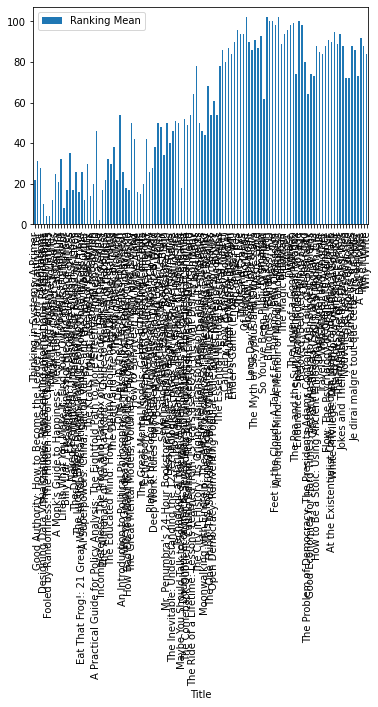

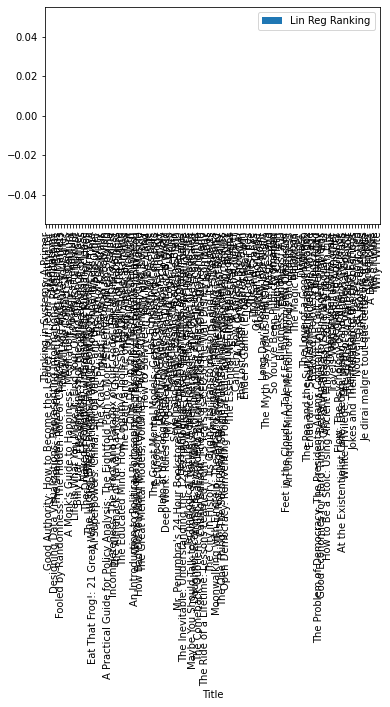

In [485]:
plt.figure(figsize=(15,8))
omg.plot.bar(x="Title",y="Ranking Mean")
omg.plot.bar(x="Title",y="Lin Reg Ranking")

In [486]:
results2[["Title","Author","Average Rating","Predicted Rating"]]

KeyError: "['Predicted Rating'] not in index"

## k Neighbours Classifier

In [499]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
k_scores=[]
for k in range(1,31):
    # 2. run KNeighborsClassifier with k neighbours
    knn = KNeighborsClassifier(n_neighbors=k)
    # 3. obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    # 4. append mean of scores for k neighbors to k_scores list
    k_scores.append(scores.mean())

In [500]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=8)

In [501]:
y_pred = knn.predict(X_test)

In [502]:
knn.score(X_train, y_train)

0.6650943396226415

In [503]:
knn_class_model = knn

In [504]:
predictors2 = knn.predict(X_for_predict[['self-development', 'school', 'fantasy', 'economics', 'biography',
       'france', 'french-literature', 'personal-development',
       'historical-fiction', 'self-improvement', 'politics', 'science',
       'self-help', 'history', 'french', 'business', 'novels', 'psychology',
       'philosophy', 'classic', 'literature', 'classics', 'fiction',
       'nonfiction', 'Average Rating']])

In [505]:
predictors2 = pd.DataFrame(predictors2)

In [506]:
predictors2 = predictors2.reset_index()

In [507]:
finale2 = not_read

In [508]:
results2 = finale2.merge(predictors2, on="index").sort_values(by=0, ascending=False)

In [509]:
results2["KNN Class Predicted Rating"] = results2[0] 
results2["KNN Class Ranking"] = results2[["KNN Class Predicted Rating"]].sort_values(by=0,axis="columns").rank(axis="rows",method="first",ascending=False).round(decimals=0)


In [510]:
results2[0]

0     5
29    5
33    5
35    5
36    5
     ..
78    0
79    0
80    0
81    0
67    0
Name: 0, Length: 114, dtype: int64

In [511]:
omg = results2[["Title","KNN Class Predicted Rating", "KNN Class Ranking"]].merge(omg,on="Title")

In [512]:
omg["Ranking Mean"] = omg[["Lin Reg Ranking","Log Reg Ranking","KNN Reg Ranking"]].mean(axis=1).round(decimals=0)

In [513]:
final_table = omg[["Title","Author_x","Average Rating_x","Lin Reg Predicted Rating","Lin Reg Ranking","Log Reg Predicted Rating","Log Reg Ranking", "KNN Reg Predicted Rating","KNN Reg Ranking","KNN Class Predicted Rating","KNN Class Ranking","Ranking Mean"]]



In [514]:
final_table = final_table.sort_values(by="Lin Reg Ranking", ascending=True)

In [515]:
final_table

,Title,Author_x,Average Rating_x,Lin Reg Predicted Rating,Lin Reg Ranking,Log Reg Predicted Rating,Log Reg Ranking,KNN Reg Predicted Rating,KNN Reg Ranking,KNN Class Predicted Rating,KNN Class Ranking,Ranking Mean
0,"Maybe You Should Talk to Someone: A Therapist,...",Lori Gottlieb,4.37,2.756401,NaN,5,1.0,3.8,34.0,5,1.0,18.0
1,Incompleteness: The Proof and Paradox of Kurt ...,Rebecca Goldstein,4.00,4.279418,NaN,5,18.0,4.8,16.0,5,2.0,17.0
2,The Kraus Project: Essays by Karl Kraus,Jonathan Franzen,3.37,4.445996,NaN,5,21.0,5.0,6.0,5,3.0,14.0
3,An Introduction to Political Philosophy: Ten E...,Leo Strauss,4.26,3.852251,NaN,5,23.0,4.2,30.0,5,4.0,26.0
4,Libraries of the Future,J.C.R. Licklider,4.42,4.135374,NaN,5,24.0,3.6,39.0,5,5.0,32.0
...,...,...,...,...,...,...,...,...,...,...,...,...
109,Flow: The Psychology of Optimal Experience,Mihaly Csikszentmihalyi,4.09,0.698763,NaN,0,80.0,0.0,102.0,0,110.0,91.0
110,A Doll's House,Henrik Ibsen,3.74,0.637325,NaN,0,81.0,0.0,103.0,0,111.0,92.0
111,The Crucible,Arthur Miller,3.59,0.637325,NaN,0,82.0,0.0,95.0,0,112.0,88.0
112,The Importance of Being Earnest,Oscar Wilde,4.18,0.678283,NaN,0,83.0,0.0,104.0,0,113.0,94.0


## Test

In [93]:
final_table["Lin Reg Predicted Rating"]

0      5.307788
1      5.247132
2      3.547352
3      5.479397
4      3.607909
         ...   
109    0.643770
110    1.496984
111    1.501650
112    1.478320
113    0.545787
Name: Lin Reg Predicted Rating, Length: 114, dtype: float64

In [94]:
my_range=range(1,115)

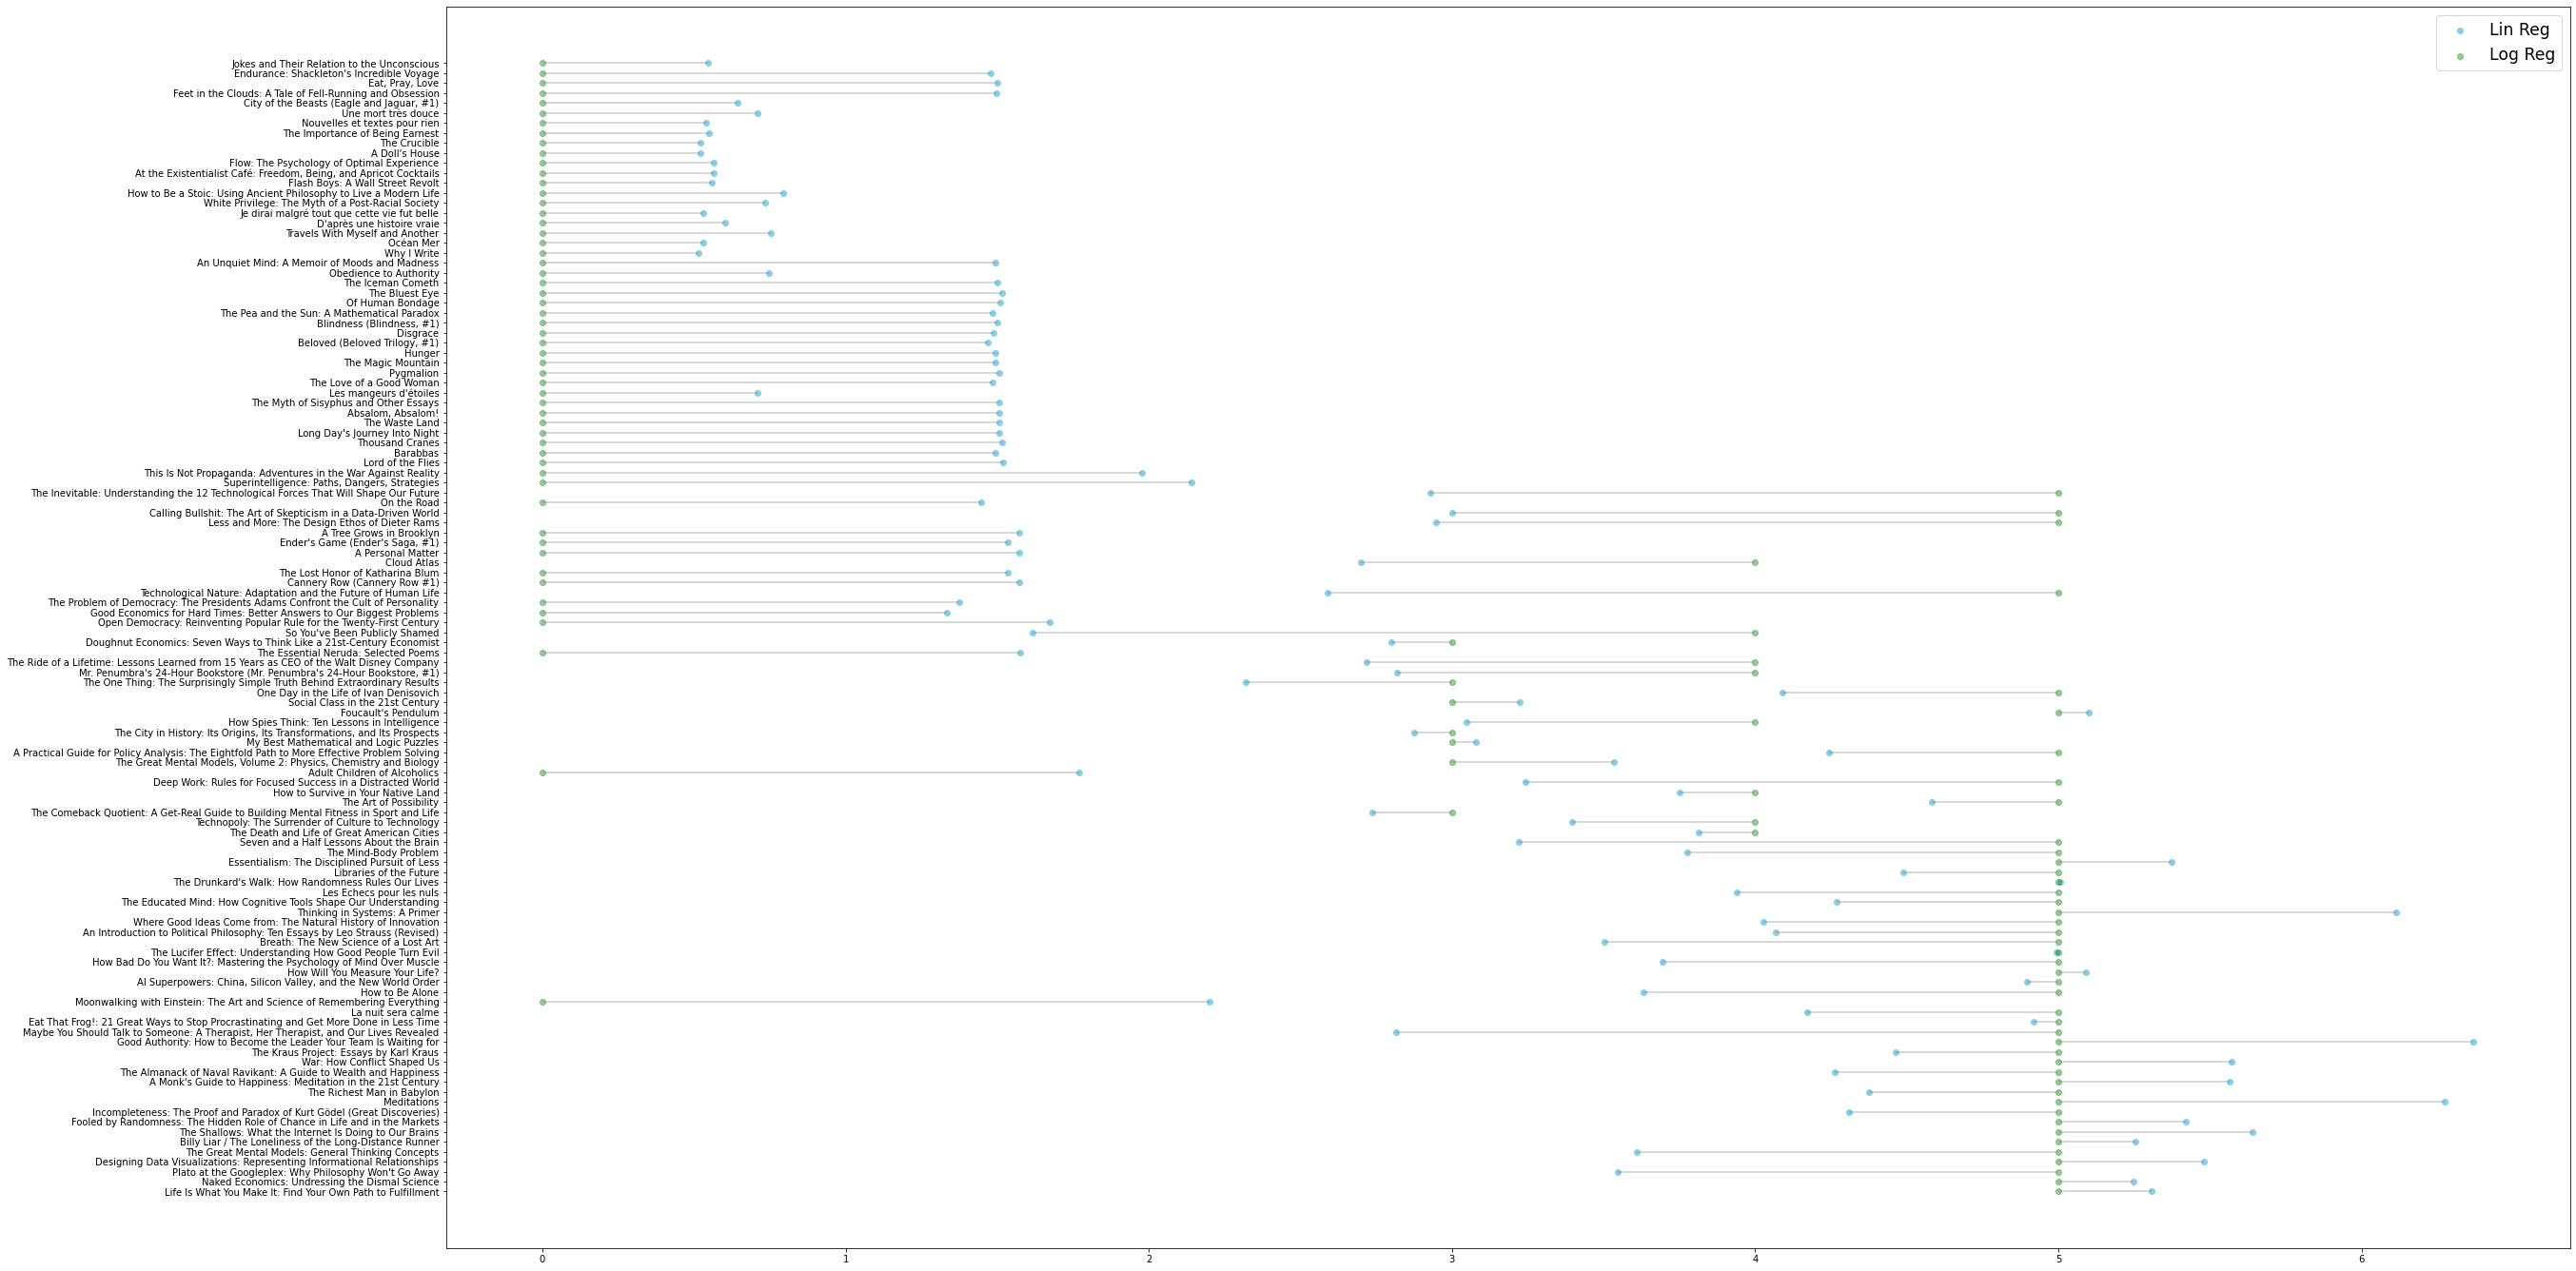

In [95]:
plt.figure(figsize=(40,24))

plt.hlines(y=range(1,115), xmin=final_table['Lin Reg Predicted Rating'].astype(object), xmax=final_table['Log Reg Predicted Rating'].astype(object), color='grey', alpha=0.4)
plt.scatter(final_table['Lin Reg Predicted Rating'], my_range, color='skyblue', alpha=1, label='Lin Reg')
plt.scatter(final_table['Log Reg Predicted Rating'], my_range, color='green', alpha=0.4 , label='Log Reg')
plt.yticks(my_range, final_table['Title'])
plt.legend(fontsize="xx-large")
plt.show()



<AxesSubplot:>

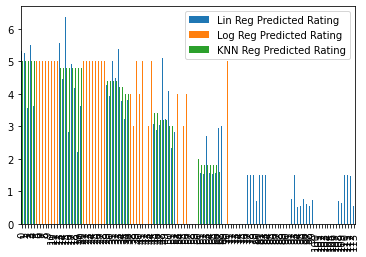

In [96]:
final_table[["Lin Reg Predicted Rating","Log Reg Predicted Rating","KNN Reg Predicted Rating"]].plot(kind="bar")



<AxesSubplot:xlabel='Title', ylabel='Lin Reg Ranking'>

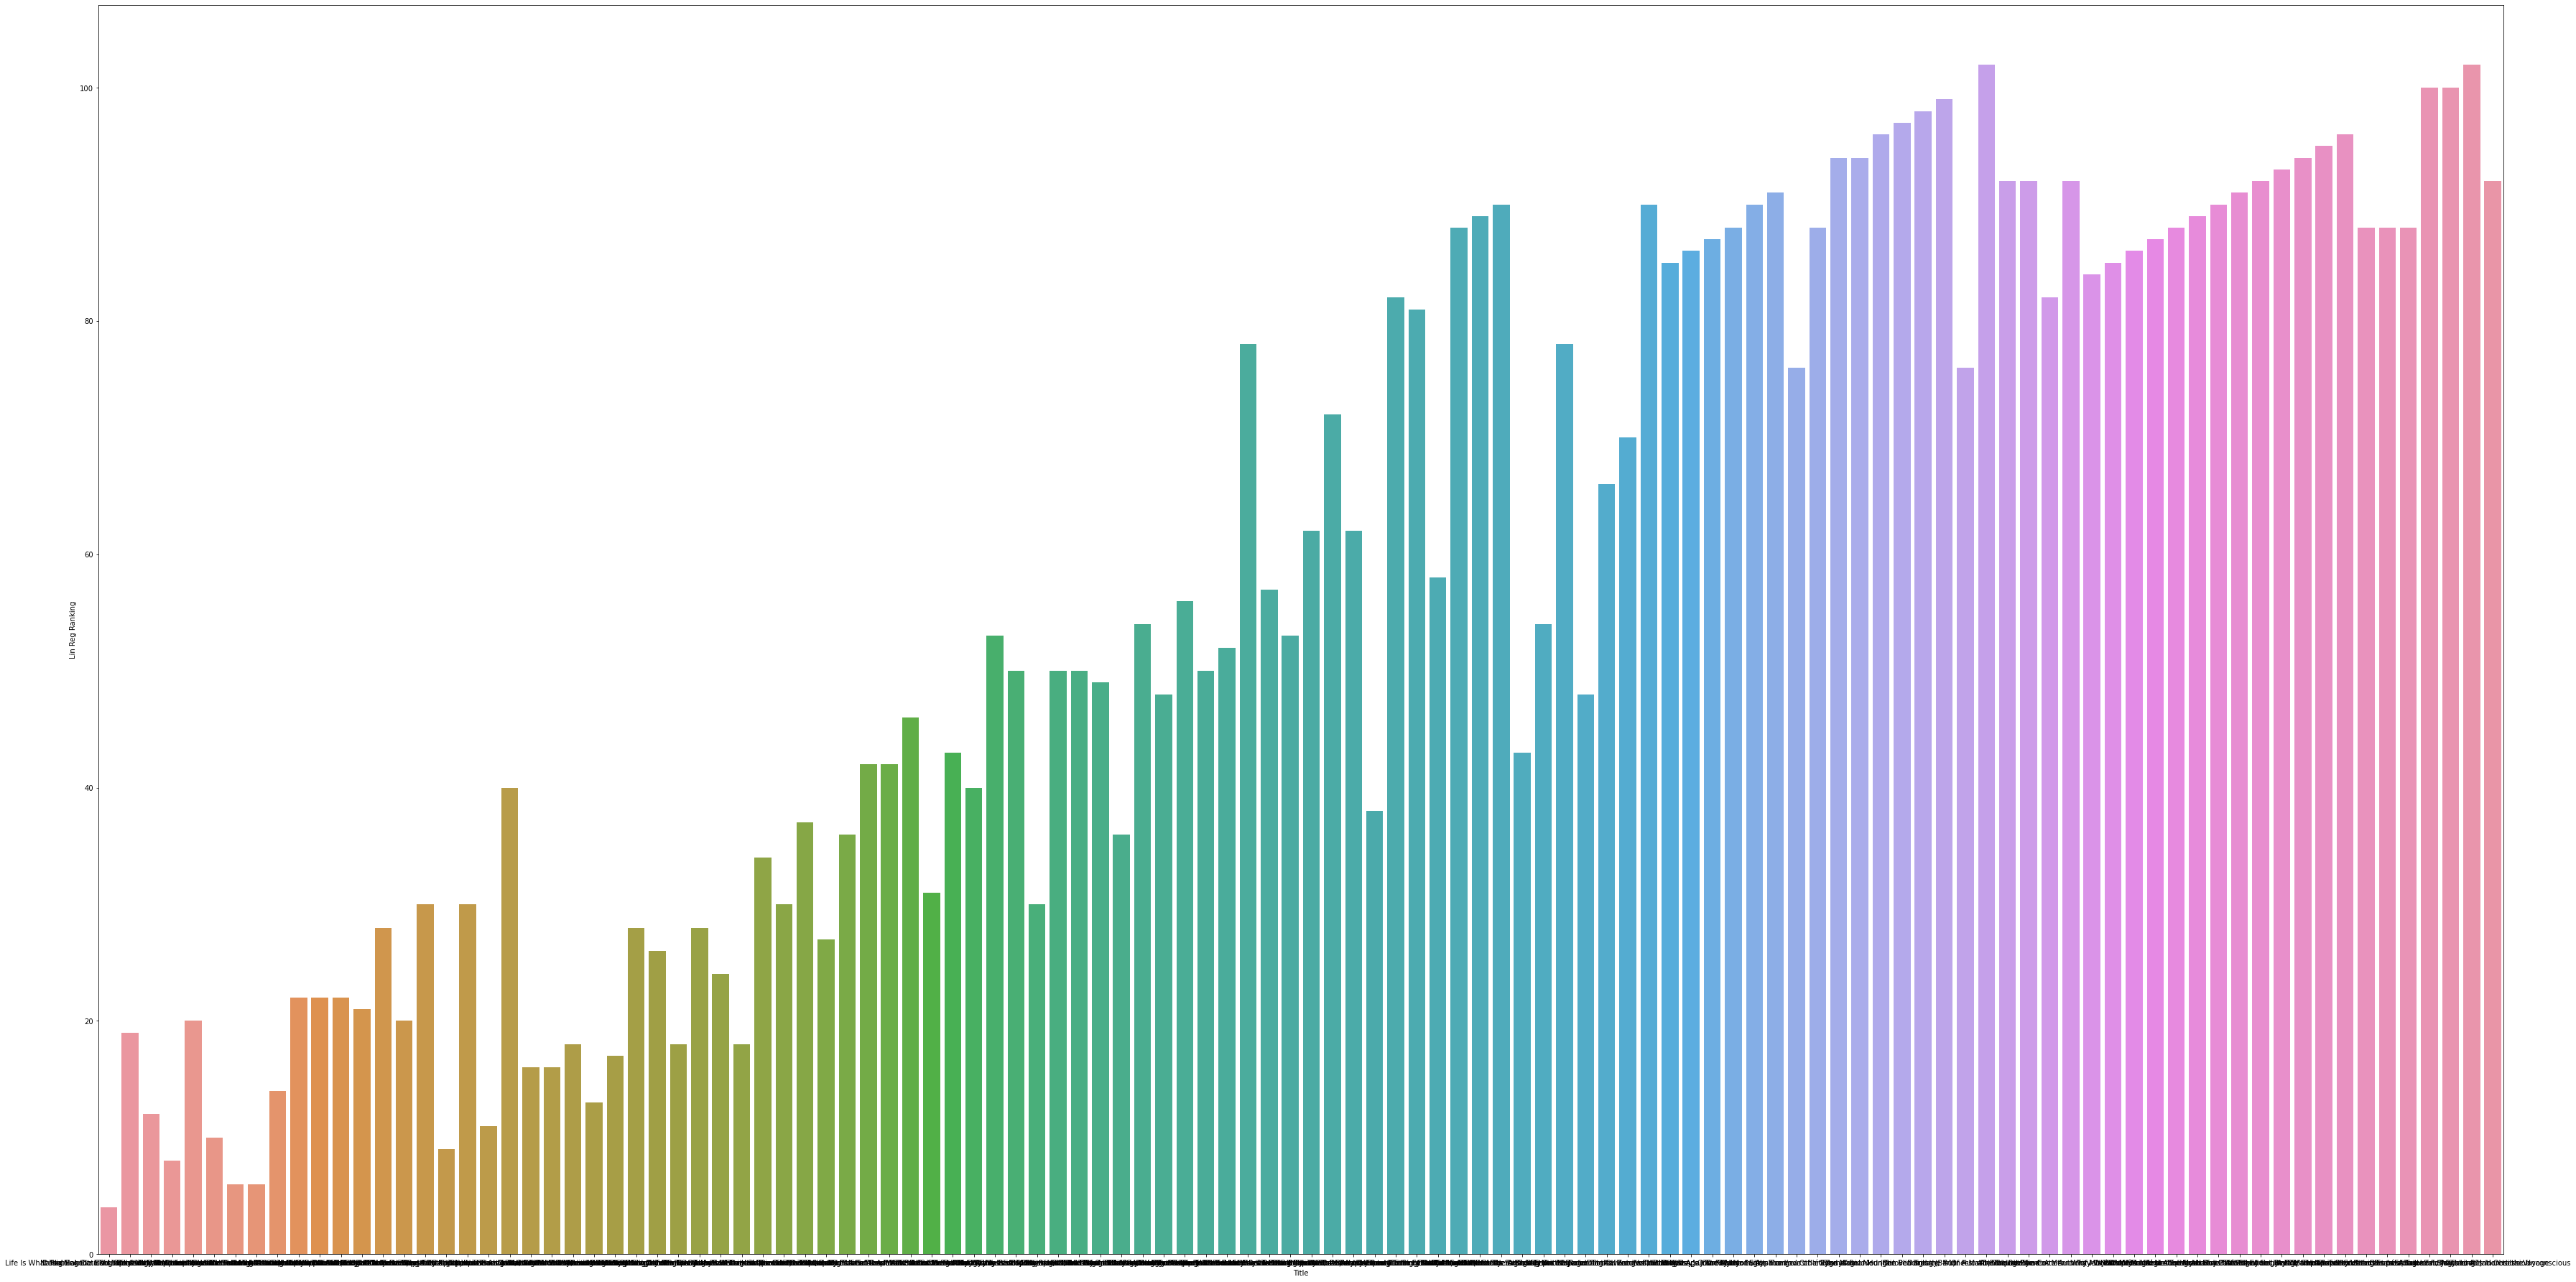

In [97]:
plt.figure(figsize=(60,32))
sns.barplot(x="Title",y="Ranking Mean",data=final_table)
sns.barplot(x="Title",y="Lin Reg Ranking",data=final_table)

# Obtaining All Books

In [98]:
all_books = pd.read_csv("books.csv",error_bad_lines=False)
all_books

b'Skipping line 3350: expected 12 fields, saw 13\nSkipping line 4704: expected 12 fields, saw 13\nSkipping line 5879: expected 12 fields, saw 13\nSkipping line 8981: expected 12 fields, saw 13\n'


,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic
...,...,...,...,...,...,...,...,...,...,...,...,...
11118,45631,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,1560254416,9781560254416,eng,512,156,20,12/21/2004,Da Capo Press
11119,45633,You Bright and Risen Angels,William T. Vollmann,4.08,0140110879,9780140110876,eng,635,783,56,12/1/1988,Penguin Books
11120,45634,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,0140131965,9780140131963,eng,415,820,95,8/1/1993,Penguin Books
11121,45639,Poor People,William T. Vollmann,3.72,0060878827,9780060878825,eng,434,769,139,2/27/2007,Ecco


In [99]:
all_books

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic
...,...,...,...,...,...,...,...,...,...,...,...,...
11118,45631,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,1560254416,9781560254416,eng,512,156,20,12/21/2004,Da Capo Press
11119,45633,You Bright and Risen Angels,William T. Vollmann,4.08,0140110879,9780140110876,eng,635,783,56,12/1/1988,Penguin Books
11120,45634,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,0140131965,9780140131963,eng,415,820,95,8/1/1993,Penguin Books
11121,45639,Poor People,William T. Vollmann,3.72,0060878827,9780060878825,eng,434,769,139,2/27/2007,Ecco


## Getting the Genres

In [106]:
isbns=[]
for i in all_books["isbn"]:
    isbns.append(i)

In [107]:
genreExceptions = [
'to-read', 'currently-reading', 'owned', 'default', 'favorites', 'books-i-own',
'ebook', 'kindle', 'library', 'audiobook', 'owned-books', 'audiobooks', 'my-books',
'ebooks', 'to-buy', 'english', 'calibre', 'books', 'british', 'audio', 'my-library',
'favourites', 're-read', 'general', 'e-books',"read-in-2020"
] #ignore these different bookshelves
genres = []

In [108]:
def get_id():
    count = 0
    for i in isbns:
        test= requests.get(f"https://www.goodreads.com/search?q={i}&format=xml&key=TTL1SltyHTYVjZHafssQxw",allow_redirects=False)
        test = BeautifulSoup(test.content, "xml")
        try:
            book_id = test.work.best_book.id.text
            get_xml(book_id)
        except AttributeError:
            genres.append(0)
        count += 1
        print(count)
        print(book_id)
    return genres

In [109]:
def get_xml(i): #obtaining the bookshelves in which the book is included 
    if requests.get(f"https://www.goodreads.com/book/show/{i}?key=xQXvrwOTLq7xonOLcjt2A",allow_redirects=False):
        test = requests.get(f"https://www.goodreads.com/book/show/{i}?key=xQXvrwOTLq7xonOLcjt2A",allow_redirects=False)
        test = BeautifulSoup(test.content, "lxml")
        shelves = test.find("popular_shelves")
        finding_genres(shelves)
    else: 
        genres.append(0)
    return genres

In [110]:
def finding_genres(shelves): #filtering the bookshelves to obtain only
    prov_genres = [] #the first 8 results
    try: 
        for i in shelves:
            if len(i) == 0:
                x = i.attrs["name"]
                if x not in genreExceptions:
                    if len(prov_genres) < 8:
                        x = x.replace("non-fiction","nonfiction").lower()
                        prov_genres.append(x)
                        prov_genres = list(dict.fromkeys(prov_genres))
        genres.append(prov_genres)
    except TypeError:
        genres.append(0)
    return genres

In [111]:
get_id()

1
53178655
2
57451934
3
4
4
5
5
8
6
9
7
10
8
12
9
13
10
14
11
16
12
18
13
21
14
22
15
23
16
24
17
25
18
26
19
27
20
28
21
29
22
30
23
31
24
34
25
35
26
36
27
37
28
45
29
50
30
51
31
53
32
54
33
55
34
57
35
58
36
59
37
61
38
63
39
66
40
67
41
68
42
69
43
71
44
72
45
74
46
75
47
76
48
77
49
78
50
79
51
80
52
81
53
83
54
85
55
86
56
89
57
90
58
91
59
92
60
93
61
94
62
96
63
98
64
99
65
100
66
103
67
56187039
68
106
69
107
70
109
71
110
72
117
73
119
74
122
75
123
76
129
77
130
78
131
79
132
80
133
81
135
82
137
83
138
84
139
85
140
86
141
87
142
88
144
89
147
90
151
91
152
92
153
93
154
94
155
95
156
96
157
97
159
98
160
99
162
100
163
101
164
102
165
103
166
104
168
105
171
106
177
107
180
108
181
109
182
110
201
111
204
112
205
113
207
114
208
115
213
116
214
117
216
118
230
119
231
120
237
121
244
122
245
123
247
124
249
125
250
126
251
127
252
128
253
129
264
130
269
131
277
132
278
133
37760311
134
285
135
288
136
289
137
290
138
291
139
292
140
295
141
296
142
297
143
298
144
299
14

955
3152
956
3155
957
3156
958
3167
959
3207
960
3231
961
3232
962
3248
963
3254
964
3258
965
3273
966
3280
967
3283
968
3290
969
3291
970
3293
971
3298
972
3300
973
3301
974
3302
975
3303
976
3304
977
3311
978
3316
979
3325
980
3340
981
3341
982
3343
983
3344
984
3345
985
3346
986
3347
987
3348
988
3351
989
3357
990
3359
991
3368
992
3384
993
3388
994
3402
995
3403
996
3404
997
3409
998
3413
999
3416
1000
3417
1001
3418
1002
3419
1003
3420
1004
3421
1005
3422
1006
3424
1007
3425
1008
3426
1009
3431
1010
3437
1011
3438
1012
3439
1013
3444
1014
3445
1015
3446
1016
3447
1017
3449
1018
3462
1019
3463
1020
3464
1021
3465
1022
3466
1023
3468
1024
3469
1025
3471
1026
3473
1027
3476
1028
3478
1029
3479
1030
3483
1031
3491
1032
3493
1033
3507
1034
3509
1035
3510
1036
3513
1037
3516
1038
3519
1039
3520
1040
3525
1041
3529
1042
3530
1043
3531
1044
3532
1045
3536
1046
3545
1047
3554
1048
3557
1049
3562
1050
3564
1051
3566
1052
3574
1053
3577
1054
3579
1055
3580
1056
3581
1057
3582
1058
3583
1059


1776
6230
1777
6240
1778
6245
1779
6253
1780
6259
1781
6273
1782
6286
1783
6288
1784
6290
1785
6291
1786
6293
1787
6294
1788
6295
1789
6296
1790
6297
1791
6298
1792
6302
1793
6310
1794
6311
1795
6316
1796
6326
1797
6329
1798
6332
1799
6334
1800
6335
1801
6339
1802
6340
1803
6341
1804
6342
1805
6343
1806
6346
1807
6360
1808
6366
1809
6367
1810
55020864
1811
6407
1812
6414
1813
6418
1814
6419
1815
6422
1816
6424
1817
6425
1818
6426
1819
6438
1820
6440
1821
6441
1822
6459
1823
6460
1824
6462
1825
6466
1826
6475
1827
6480
1828
6482
1829
6483
1830
6505
1831
6511
1832
6524
1833
6526
1834
6527
1835
6528
1836
6530
1837
6534
1838
6536
1839
6537
1840
6539
1841
6540
1842
6541
1843
6542
1844
6543
1845
6544
1846
6545
1847
6546
1848
6549
1849
6550
1850
6551
1851
6552
1852
6553
1853
6556
1854
6557
1855
6562
1856
6568
1857
6572
1858
6588
1859
6595
1860
6611
1861
6613
1862
6614
1863
6615
1864
6618
1865
6619
1866
6624
1867
6625
1868
6628
1869
6635
1870
6640
1871
6644
1872
6654
1873
6655
1874
6656
1875
6

2592
9532
2593
9534
2594
9538
2595
9539
2596
9540
2597
9542
2598
9544
2599
9550
2600
9551
2601
9553
2602
17181679
2603
9557
2604
9558
2605
9566
2606
9567
2607
9571
2608
9577
2609
9582
2610
9585
2611
9590
2612
9591
2613
9592
2614
9593
2615
9594
2616
9595
2617
9599
2618
9602
2619
9603
2620
9605
2621
9619
2622
9620
2623
9622
2624
9623
2625
9626
2626
9629
2627
9632
2628
9633
2629
9635
2630
9638
2631
9639
2632
9644
2633
9646
2634
9648
2635
9652
2636
9653
2637
9657
2638
9659
2639
9660
2640
9666
2641
9669
2642
9677
2643
9681
2644
9696
2645
9704
2646
9712
2647
9713
2648
9714
2649
9717
2650
9723
2651
9735
2652
9739
2653
9742
2654
9746
2655
9754
2656
9755
2657
9763
2658
9767
2659
9784
2660
9786
2661
9787
2662
9789
2663
9791
2664
9796
2665
9799
2666
9802
2667
9802
2668
9811
2669
9813
2670
9815
2671
9816
2672
9820
2673
9826
2674
9827
2675
9828
2676
9831
2677
9832
2678
9833
2679
9838
2680
9840
2681
9841
2682
9844
2683
9862
2684
9863
2685
9864
2686
9865
2687
9866
2688
9873
2689
9875
2690
9888
2691
9

3346
12216
3347
12220
3348
12222
3349
12225
3350
12226
3351
12230
3352
12240
3353
12248
3354
12249
3355
12250
3356
12254
3357
12256
3358
12263
3359
12268
3360
12274
3361
12275
3362
12279
3363
12288
3364
12290
3365
12292
3366
12293
3367
12296
3368
12297
3369
12299
3370
12300
3371
12301
3372
12302
3373
12315
3374
12317
3375
12319
3376
12321
3377
12322
3378
12328
3379
12335
3380
12346
3381
12349
3382
12350
3383
12352
3384
12358
3385
12365
3386
12366
3387
12370
3388
12372
3389
12375
3390
12378
3391
12381
3392
12383
3393
12395
3394
12398
3395
12401
3396
12408
3397
12412
3398
12417
3399
57176048
3400
12424
3401
12427
3402
12441
3403
12442
3404
12444
3405
12445
3406
12447
3407
12448
3408
12451
3409
12457
3410
12458
3411
12461
3412
12466
3413
12467
3414
12468
3415
12473
3416
12474
3417
12477
3418
12478
3419
12482
3420
12488
3421
12495
3422
12496
3423
12497
3424
12502
3425
12505
3426
12511
3427
12513
3428
12517
3429
12522
3430
12526
3431
12527
3432
12528
3433
12532
3434
12533
3435
12535
3436
12

4090
14591
4091
14595
4092
14604
4093
14605
4094
14606
4095
14616
4096
14640
4097
14641
4098
14644
4099
14647
4100
14648
4101
14656
4102
14657
4103
14658
4104
14659
4105
14663
4106
14664
4107
14666
4108
14670
4109
14673
4110
14679
4111
14680
4112
14684
4113
14686
4114
14688
4115
14691
4116
14693
4117
14698
4118
14705
4119
14706
4120
14707
4121
14712
4122
14719
4123
14721
4124
14729
4125
14731
4126
14741
4127
14743
4128
14748
4129
14755
4130
14756
4131
14768
4132
14769
4133
14770
4134
14778
4135
14781
4136
14785
4137
14786
4138
14788
4139
14790
4140
14808
4141
14812
4142
14817
4143
14836
4144
14839
4145
14841
4146
14851
4147
14861
4148
14864
4149
14865
4150
14866
4151
14867
4152
14868
4153
14870
4154
14883
4155
14886
4156
14888
4157
14891
4158
14895
4159
14896
4160
14899
4161
14905
4162
14909
4163
14911
4164
14913
4165
14914
4166
14917
4167
14926
4168
14927
4169
14930
4170
14934
4171
14940
4172
14941
4173
14942
4174
14943
4175
14945
4176
14946
4177
14947
4178
14948
4179
14951
4180
14959

4833
17341
4834
17344
4835
17349
4836
17352
4837
17355
4838
17356
4839
17360
4840
17362
4841
17364
4842
17366
4843
17375
4844
17384
4845
17412
4846
17426
4847
17435
4848
17437
4849
17461
4850
17468
4851
17473
4852
17488
4853
17496
4854
17503
4855
17506
4856
17510
4857
17511
4858
17513
4859
17518
4860
17533
4861
17544
4862
17546
4863
17548
4864
17550
4865
17557
4866
17580
4867
17581
4868
17582
4869
17593
4870
17600
4871
17601
4872
17602
4873
17603
4874
17607
4875
17608
4876
17609
4877
17610
4878
17619
4879
17624
4880
17632
4881
17635
4882
17639
4883
17643
4884
17644
4885
17645
4886
17646
4887
17650
4888
17654
4889
17658
4890
17671
4891
17673
4892
17675
4893
17679
4894
17682
4895
17683
4896
17686
4897
17687
4898
17688
4899
54658358
4900
17691
4901
17692
4902
17694
4903
17697
4904
17698
4905
17701
4906
17702
4907
17707
4908
17722
4909
17724
4910
17726
4911
17727
4912
17728
4913
17730
4914
17733
4915
17735
4916
17743
4917
17747
4918
17761
4919
17762
4920
17766
4921
17770
4922
17778
4923
17

5575
20410
5576
20413
5577
20417
5578
20420
5579
20422
5580
20423
5581
20424
5582
20425
5583
20429
5584
20468
5585
20498
5586
20501
5587
20502
5588
20505
5589
20509
5590
20517
5591
20518
5592
20519
5593
20525
5594
20531
5595
20547
5596
20549
5597
20552
5598
20562
5599
20564
5600
20567
5601
20645
5602
20646
5603
20657
5604
20660
5605
20661
5606
20668
5607
20671
5608
20677
5609
20679
5610
20687
5611
20692
5612
20694
5613
20738
5614
20741
5615
20749
5616
20775
5617
20781
5618
20794
5619
20800
5620
20807
5621
20809
5622
20810
5623
20812
5624
20813
5625
20833
5626
20848
5627
20862
5628
20865
5629
20867
5630
20868
5631
20869
5632
20873
5633
20876
5634
20879
5635
20891
5636
20895
5637
20913
5638
20928
5639
20929
5640
20930
5641
20932
5642
20934
5643
20935
5644
20941
5645
20942
5646
20944
5647
20949
5648
20954
5649
20957
5650
20962
5651
20971
5652
20972
5653
21004
5654
21010
5655
21012
5656
21016
5657
21029
5658
21031
5659
21032
5660
21059
5661
21060
5662
21062
5663
21063
5664
21070
5665
21071

6318
23818
6319
23824
6320
23827
6321
23832
6322
23835
6323
23837
6324
23840
6325
23841
6326
23843
6327
23845
6328
23846
6329
23847
6330
23848
6331
23849
6332
23856
6333
23859
6334
23870
6335
23875
6336
23876
6337
23877
6338
23878
6339
23882
6340
23884
6341
23886
6342
23887
6343
23894
6344
23895
6345
23900
6346
23903
6347
23912
6348
23913
6349
23917
6350
23919
6351
23920
6352
23922
6353
56234572
6354
23926
6355
23928
6356
23929
6357
23930
6358
23931
6359
23932
6360
23937
6361
23940
6362
23942
6363
23944
6364
23945
6365
23946
6366
23948
6367
23950
6368
23952
6369
23955
6370
23961
6371
23963
6372
23964
6373
23966
6374
23968
6375
23975
6376
23979
6377
23984
6378
23989
6379
24001
6380
24006
6381
24010
6382
24028
6383
24037
6384
24040
6385
24043
6386
24047
6387
24048
6388
24050
6389
24052
6390
24054
6391
24056
6392
24058
6393
24060
6394
24062
6395
24064
6396
24065
6397
24066
6398
24073
6399
24079
6400
24087
6401
24089
6402
24093
6403
24094
6404
24096
6405
24100
6406
24115
6407
24119
6408
24

7062
26922
7063
26930
7064
26931
7065
26934
7066
26950
7067
26968
7068
26973
7069
26979
7070
26994
7071
26996
7072
26999
7073
27000
7074
27001
7075
27002
7076
27003
7077
27005
7078
27006
7079
27009
7080
27023
7081
27036
7082
27038
7083
27039
7084
27049
7085
27051
7086
27052
7087
27054
7088
27059
7089
27066
7090
27091
7091
27092
7092
27118
7093
27126
7094
27149
7095
27150
7096
27151
7097
27167
7098
27168
7099
27170
7100
27171
7101
27189
7102
27194
7103
27200
7104
27204
7105
27208
7106
27222
7107
27236
7108
27243
7109
27247
7110
27252
7111
27253
7112
27266
7113
27269
7114
27277
7115
27293
7116
27295
7117
27297
7118
27298
7119
27299
7120
27303
7121
27304
7122
27306
7123
27308
7124
27309
7125
27310
7126
27313
7127
27315
7128
27323
7129
27326
7130
27333
7131
27345
7132
27347
7133
27356
7134
27363
7135
27368
7136
27385
7137
27397
7138
27398
7139
27399
7140
27404
7141
27410
7142
27411
7143
27413
7144
27415
7145
27416
7146
27418
7147
27419
7148
27420
7149
27421
7150
27422
7151
27423
7152
27424

7805
30097
7806
30104
7807
30106
7808
30107
7809
30112
7810
30117
7811
30118
7812
30122
7813
30125
7814
30128
7815
30129
7816
30134
7817
30143
7818
30160
7819
30162
7820
30164
7821
30165
7822
30174
7823
30176
7824
30183
7825
30186
7826
30187
7827
30189
7828
30190
7829
30191
7830
30193
7831
30194
7832
30196
7833
30199
7834
30200
7835
30206
7836
30214
7837
30215
7838
30220
7839
30223
7840
30224
7841
30225
7842
30226
7843
30227
7844
30228
7845
30229
7846
30230
7847
30231
7848
30232
7849
30233
7850
30236
7851
30240
7852
30241
7853
30242
7854
30243
7855
30244
7856
30245
7857
30246
7858
30247
7859
30248
7860
30249
7861
30250
7862
30253
7863
30258
7864
30259
7865
30260
7866
30262
7867
30263
7868
30264
7869
30268
7870
30270
7871
30271
7872
30272
7873
30273
7874
30274
7875
30279
7876
30280
7877
30281
7878
30282
7879
30284
7880
30288
7881
30289
7882
30290
7883
30292
7884
30293
7885
30294
7886
30296
7887
30298
7888
30300
7889
30314
7890
30316
7891
30317
7892
30318
7893
30323
7894
30331
7895
30334

8549
32830
8550
32831
8551
32832
8552
32833
8553
32835
8554
32836
8555
32843
8556
32844
8557
32849
8558
32854
8559
32872
8560
32880
8561
32884
8562
32893
8563
32899
8564
32900
8565
32913
8566
32915
8567
32916
8568
32919
8569
32929
8570
32936
8571
32939
8572
32941
8573
32942
8574
32946
8575
32947
8576
32950
8577
32951
8578
32957
8579
32961
8580
32964
8581
32966
8582
32975
8583
32977
8584
32979
8585
32980
8586
32981
8587
32986
8588
32987
8589
32994
8590
33001
8591
33002
8592
33007
8593
33008
8594
33013
8595
33015
8596
33017
8597
33024
8598
33025
8599
33026
8600
33028
8601
33029
8602
33030
8603
33032
8604
33046
8605
33052
8606
33057
8607
33064
8608
33075
8609
33130
8610
33131
8611
33133
8612
33137
8613
33139
8614
33144
8615
33151
8616
33152
8617
33153
8618
33155
8619
33157
8620
33158
8621
33159
8622
33169
8623
33174
8624
33175
8625
33179
8626
33180
8627
33185
8628
33186
8629
33191
8630
33192
8631
33194
8632
33195
8633
33197
8634
33198
8635
33247
8636
33263
8637
33279
8638
33282
8639
33288

9293
36555
9294
36556
9295
36567
9296
36568
9297
36569
9298
36570
9299
36571
9300
36572
9301
36573
9302
36575
9303
36598
9304
36606
9305
36609
9306
36636
9307
36637
9308
36639
9309
36641
9310
36644
9311
36652
9312
36664
9313
36665
9314
36666
9315
36667
9316
36677
9317
36679
9318
36681
9319
36706
9320
36715
9321
36717
9322
36768
9323
36775
9324
36822
9325
36853
9326
36859
9327
36865
9328
36893
9329
36904
9330
36925
9331
36926
9332
36946
9333
36952
9334
36953
9335
36956
9336
36958
9337
37003
9338
37023
9339
37024
9340
37027
9341
37032
9342
37033
9343
37034
9344
37036
9345
37040
9346
37043
9347
37051
9348
37052
9349
37053
9350
37054
9351
37055
9352
37057
9353
37058
9354
37060
9355
37061
9356
37063
9357
37064
9358
37066
9359
37067
9360
37070
9361
37072
9362
37073
9363
37074
9364
37076
9365
37077
9366
37083
9367
37087
9368
37095
9369
37105
9370
37106
9371
37119
9372
37134
9373
37139
9374
37169
9375
37170
9376
37186
9377
37187
9378
37189
9379
37190
9380
37191
9381
37195
9382
37205
9383
37211

10033
40388
10034
40395
10035
40421
10036
40424
10037
40425
10038
40436
10039
40437
10040
40440
10041
40450
10042
40451
10043
40452
10044
40459
10045
40460
10046
40465
10047
40468
10048
40470
10049
40473
10050
40478
10051
40482
10052
40483
10053
40484
10054
40485
10055
40487
10056
40490
10057
40491
10058
40492
10059
40493
10060
53402496
10061
40502
10062
40504
10063
40526
10064
40528
10065
40530
10066
40531
10067
40532
10068
40536
10069
40540
10070
40543
10071
40549
10072
40551
10073
40573
10074
40582
10075
40597
10076
40604
10077
40609
10078
40620
10079
40622
10080
40625
10081
40626
10082
40630
10083
40631
10084
40636
10085
40640
10086
40646
10087
40663
10088
40664
10089
40694
10090
40700
10091
40706
10092
40710
10093
40718
10094
40763
10095
40789
10096
40790
10097
40792
10098
40795
10099
40798
10100
40806
10101
40807
10102
40816
10103
40821
10104
40833
10105
40836
10106
40859
10107
40863
10108
40868
10109
40870
10110
40877
10111
40880
10112
40884
10113
40888
10114
40889
10115
40891
1

10715
43704
10716
43706
10717
43708
10718
43713
10719
43717
10720
43722
10721
43723
10722
43725
10723
43738
10724
43739
10725
43747
10726
43755
10727
43758
10728
43759
10729
43763
10730
43779
10731
43780
10732
43781
10733
43792
10734
43796
10735
43798
10736
43799
10737
43808
10738
43812
10739
43814
10740
43817
10741
43819
10742
43821
10743
43824
10744
43826
10745
43828
10746
43841
10747
43877
10748
43878
10749
43884
10750
43888
10751
43889
10752
43893
10753
43895
10754
43899
10755
43905
10756
43910
10757
43915
10758
43918
10759
43919
10760
43924
10761
43925
10762
43926
10763
43927
10764
43929
10765
43930
10766
43932
10767
43933
10768
43937
10769
43939
10770
43940
10771
43949
10772
43958
10773
43959
10774
43960
10775
43961
10776
43963
10777
43979
10778
43980
10779
43988
10780
43992
10781
43993
10782
43994
10783
43995
10784
43996
10785
44001
10786
44002
10787
44011
10788
44012
10789
44018
10790
44022
10791
44030
10792
44034
10793
44039
10794
44045
10795
44046
10796
44053
10797
44067
1079

[['fantasy',
  'young-adult',
  'fiction',
  'harry-potter',
  'ya',
  'series',
  'magic',
  'childrens'],
 ['fantasy',
  'young-adult',
  'fiction',
  'harry-potter',
  'ya',
  'series',
  'magic',
  'childrens'],
 ['fantasy',
  'young-adult',
  'fiction',
  'harry-potter',
  'ya',
  'series',
  'magic',
  'childrens'],
 ['fantasy',
  'young-adult',
  'fiction',
  'harry-potter',
  'ya',
  'series',
  'magic',
  'childrens'],
 ['fantasy',
  'harry-potter',
  'young-adult',
  'fiction',
  'magic',
  'ya',
  'series',
  'adventure'],
 ['audio_wanted',
  'harry-potter',
  'ignore',
  'children-and-young-adult',
  'lla_wanted',
  'lle_wanted',
  'literary',
  'journals'],
 ['fantasy',
  'harry-potter',
  'fiction',
  'young-adult',
  'ya',
  'magic',
  'series',
  'childrens'],
 ['science-fiction',
  'sci-fi',
  'fiction',
  'humor',
  'fantasy',
  'classics',
  'scifi',
  'comedy'],
 ['science-fiction',
  'sci-fi',
  'fiction',
  'humor',
  'fantasy',
  'classics',
  'scifi',
  'comedy'

In [112]:
len(genres)

11123

In [113]:
backup = genres

In [114]:
len(backup)

11123

In [116]:
all_books = all_books.reset_index()

In [117]:
genres_df2 = pd.DataFrame({"Genres":genres}).reset_index()

In [132]:
genres_df2 = genres_df2.merge(all_books,on="index")

In [121]:
#Saving df as cv
genres_df2.to_csv("goodreads_all_books.csv")

## Encoding Genres

In [161]:
#Removing Null Values
indexes = genres_df2[genres_df2["Genres"] == 0].index
indexes = indexes[::-1]
for i in indexes:
    genres.pop(i)

In [624]:
df = pd.get_dummies(pd.DataFrame(genres))
df.columns = df.columns.str.split("_").str[-1]

In [625]:
df1 = pd.DataFrame({"index":np.arange(0,11123)})

In [626]:
genres_dupli = []
for i in df.columns:
    if i not in genres_dupli:
        try: 
            df1[i]= pd.DataFrame(df[i].sum(axis=1))
            genres_dupli.append(i)
        except ValueError:
            df1[i] = pd.DataFrame(df[i])
            genres_dupli.append(i)

## Looking at the Genres

In [627]:
df1.sum().sort_values(ascending=False).head(10)

index         61855003.0
fiction            245.0
nonfiction         180.0
classics           143.0
literature          83.0
philosophy          78.0
classic             75.0
psychology          70.0
history             68.0
french              56.0
dtype: float64

# Predicting Popular Books

In [660]:
books = genres_df2.merge(df1,on="index")

In [661]:
#if necessary when average rating exists 3 times
books[["Average Rating"]] = books["average_rating_x"].mean(axis=1)
books[["Average Rating"]]

,Average Rating
0,4.57
1,4.49
2,4.42
3,4.56
4,4.78
...,...
11118,4.06
11119,4.08
11120,3.96
11121,3.72


## Cleaning Our DF

In [662]:
for i in ['self-development', 'school', 'fantasy', 'economics', 'biography',
       'france', 'french-literature', 'personal-development',
       'historical-fiction', 'self-improvement', 'politics', 'science',
       'self-help', 'history', 'french', 'business', 'novels', 'psychology',
       'philosophy', 'classic', 'literature', 'classics', 'fiction',
       'nonfiction', 'average_rating_x']:
    books[i] = books[i].fillna(0)

In [663]:
books = books.drop(labels='average_rating_x',axis=1)

In [664]:
books = books.reset_index()
books["Index"] = books["index"]

In [667]:
#Removing Triplets
books["a"], books["b"],books["c"] = books[["authors_x"]]
books[["a","b","c"]] = books["authors_x"]
books["Author"] = books["a"]

In [668]:
#Removing Triplets
books["d"], books["e"],books["f"] = books[["title_x"]]
books[["d","e","f"]] = books["title_x"]
books["Title"] = books["d"]

In [687]:
def remove_triplets(old,new):
    books["d"], books["e"],books["f"] = books[[old]]
    books[["d","e","f"]] = books[old]
    books[new] = books["d"]

In [702]:
def action():
    modifications = {"  num_pages_x":"#Pages","ratings_count_x":"Ratings Count","publication_date_x":"Publication Date",\
    "language_code_x":"Language Code"}
    for i,j in modifications.items():
        remove_triplets(i,j)

## Predicting

In [670]:
models = {lin_model:0,log_model:1,knn_reg_model:2,knn_class_model:3}
name = ["Lin Reg","Log Reg","KNN Reg","KNN Class"]
for i,j in models.items():
    predictors = i.predict(books[['self-development', 'school', 'fantasy', 'economics', 'biography',
       'france', 'french-literature', 'personal-development',
       'historical-fiction', 'self-improvement', 'politics', 'science',
       'self-help', 'history', 'french', 'business', 'novels', 'psychology',
       'philosophy', 'classic', 'literature', 'classics', 'fiction',
       'nonfiction', 'Average Rating']])
    predictors = pd.DataFrame(predictors)
    predictors[f"{name[j]} Predicted Rating"] = predictors[0]
    predictors.drop(labels=0,axis=1,inplace=True)
    predictors = predictors.reset_index()
    predictors["Index"] = predictors["index"]
    x = books.merge(predictors, on="index")
    books = x
    books[f"{name[j]} Ranking"] = books[[f"{name[j]} Predicted Rating"]].sort_values(by=0,axis="columns").rank(axis="rows",method="first",ascending=False).round(decimals=0)
    

In [705]:
books["Average Ranking"] = books[["Log Reg Ranking","Lin Reg Ranking","KNN Reg Ranking","KNN Class Ranking"]].mean(axis=1)
final_results = books[["Title","Author","Average Rating","#Pages","Ratings Count","Publication Date","Language Code","Average Ranking","Log Reg Predicted Rating","Log Reg Ranking",\
         "Lin Reg Predicted Rating","Lin Reg Ranking",\
        "KNN Reg Predicted Rating", "KNN Reg Ranking",\
        "KNN Class Predicted Rating","KNN Class Ranking"]]\
.sort_values("Average Ranking")

In [706]:
final_results

,Title,Author,Average Rating,#Pages,Ratings Count,Publication Date,Language Code,Average Ranking,Log Reg Predicted Rating,Log Reg Ranking,Lin Reg Predicted Rating,Lin Reg Ranking,KNN Reg Predicted Rating,KNN Reg Ranking,KNN Class Predicted Rating,KNN Class Ranking
52,Rising from the Plains,John McPhee,4.23,208,1341,11/1/1987,eng,12.50,5,23.0,5.508363,18.0,5.0,1.0,5,8.0
48,Annals of the Former World,John McPhee,4.34,720,3115,1/6/1999,eng,28.75,5,21.0,5.022491,43.0,4.6,44.0,5,7.0
164,Lincoln at Gettysburg: The Words That Remade A...,Garry Wills,4.14,317,120,6/12/1993,en-US,35.00,5,51.0,5.934027,8.0,4.6,52.0,5,29.0
167,Libra,Don DeLillo,3.99,480,11857,5/1/1991,eng,37.50,5,53.0,4.982260,44.0,4.8,22.0,5,31.0
97,Tolstoy: Anna Karenina,Anthony Thorlby,4.19,128,1204,11/26/1987,eng,38.00,5,36.0,4.920094,49.0,4.6,48.0,5,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363,A Million Little Lies,James Pinocchio/Pablo Fenjves,3.41,191,201,3/28/2006,en-US,10484.75,0,11078.0,0.345438,11098.0,0.0,11113.0,0,8650.0
366,Leadership in Organizations,Gary Yukl,3.68,542,55,7/7/2005,en-GB,10484.75,0,11081.0,0.507623,11089.0,0.0,11116.0,0,8653.0
372,The Clan of the Cave Bear (Earth's Children #1),Jean M. Auel,4.05,512,184418,6/25/2002,eng,10484.75,0,11087.0,0.760201,11074.0,0.0,11119.0,0,8659.0
367,Leadership,Rudolph W. Giuliani,3.72,397,1820,10/1/2002,eng,10485.25,0,11082.0,0.534928,11088.0,0.0,11117.0,0,8654.0


In [707]:
final_results.to_csv("final_results.csv")

# Additional Analysis

In [739]:
books["Publication Date"] = pd.to_datetime(books['Publication Date'], format="%d/%m/%Y")

ValueError: time data '9/16/2006' does not match format '%d/%m/%Y' (match)

<AxesSubplot:xlabel='Publication Date', ylabel='count'>

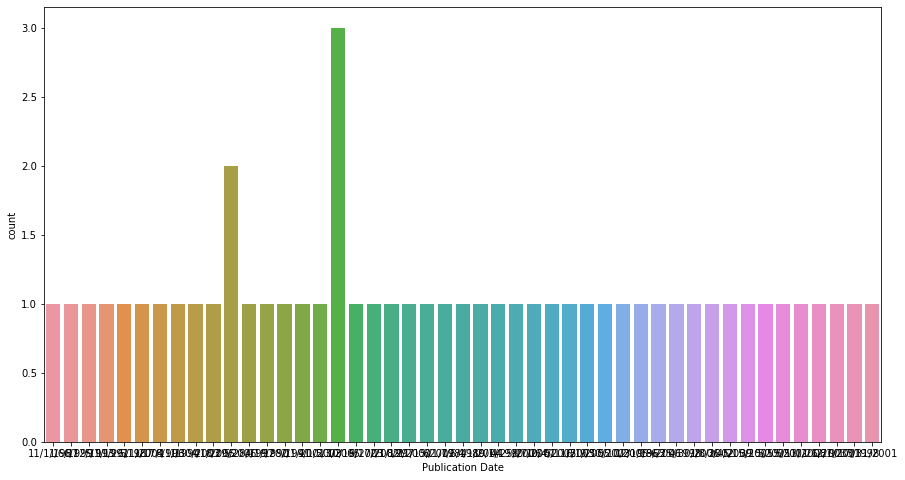

In [720]:
plt.figure(figsize=(15,8))
sns.countplot(x="Publication Date",data=final_results.head(50))

# Evaluate

In [212]:
test = requests.get("https://www.goodreads.com/search?q=0743564677&format=xml&key=TTL1SltyHTYVjZHafssQxw")
test = BeautifulSoup(test.content, "xml")
try:
    test.work.best_book.id
    print(1)
except AttributeError:
    print(2)

2


In [208]:
all_books["isbn"][667]

'0743564677'

In [143]:
all_books["title"][488]

"The Theban Plays (Everyman's Library  #93)"

## Get Images

In [ ]:
test = requests.get(f"https://www.goodreads.com/book/show/{ids[0]}?key=xQXvrwOTLq7xonOLcjt2A")
test = BeautifulSoup(test.content, "lxml")


In [ ]:
test.find("small_image_url").text

In [ ]:
response = requests. get("https://i.imgur.com/ExdKOOz.png")
file = open("sample_image.png", "wb")
file.write(response. content)
file.close()

In [ ]:
file